**Victoria_Wang_CapstoneSprint2_11242024**

**1. Project Overview: 
Leveraging text data to predict customer sentiment and product success**

In the past decade, there is an exponential growth in online purchases and E-commerce platforms. Hence, Ecommerce platforms are tasked with figuring out how customers feel about their brand, the services and product they offer. The relationship between customer sentiments and factors that influence them is valuable. Sentiment analysis allows for product-customer fit, which translates to sales and profit. According to the Statista Research Department, by 2029, the revenue in the e-commerce market in the US is estimated to reach 1.9 trillion dollars. So despite the fierce competition, there’s a lot of opportunities in the e-commerce market. We want to take advantage of these opportunities by extracting data driven insights via customer sentiment to iteratively improve product-customer fit.

**According to a 2024 survey that focus on the most profit Amazon sellers worldwid by product category from December 2023 to January 2024, the beauty and personal care category topped the chart.**

**Hence, for this project, we will focus on the beauty and personal care category for this sentiment analysis of product reviews to see how we can leverage data to predict customer sentiment and product success.**


**2. Table of Content:**
1. Project Overview
2. Table of Content
3. Data Source
4. Data Import Instructions
5. Importing relevant packages
6. EDA & Insights
7. Basic Time Series Analysis & Insights
8. Data is subsetted to 20% (3313481, 16), then later to 0.05% (82837, 16) due to kernel crashing and limited computational resource
9. Text Analysis - Preprocessing using 1) TFIDF with SVD and Base Modeling with Logistic Regression, Random Forest and AdaBoostClassifier
10. Text Analysis - Preprocessing using 2) CountVectorizer and Base Modeling with Logistic Regression, Random Forest and AdaBoostClassifier
11. Overview of Next Steps for Sprint 3

**3. Data Source**

**Citation for the dataset UCSD Amazon Reviews' 23:**

@article{hou2024bridging,
  title={Bridging Language and Items for Retrieval and Recommendation},
  author={Hou, Yupeng and Li, Jiacheng and He, Zhankui and Yan, An and Chen, Xiusi and McAuley, Julian},
  journal={arXiv preprint arXiv:2403.03952},
  year={2024}
}

Dataset: https://amazon-reviews-2023.github.io/index.html#

**Citation for beauty and personal care category as the most profitable category:**

https://www.statista.com/statistics/1400287/amazon-most-profitable-sellers-category/#:~:text=A%202024%20survey%20found%20that,with%2027%20percent%20of%20sellers.)

**4. Data Import Instructions**

**UCSD Amazon Review'23 dataset was presented in jsonl format, which was converted to csv analysis using the following:**

import pandas as pd
import json 

filepath: 'location of the jonsl file'

data = []
with open(filepath, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line.strip()))  # Load each line as a JSON object

df = pd.DataFrame(data)  # Convert the list of dicts into a DataFrame

Names of the datasets in CSV are:
1. BP_meta
2. BP

In [11]:
#5.import relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from statsmodels.api import tsa # time series analysis

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from warnings import filterwarnings
filterwarnings(action='ignore')

**6. EDA & Insights**

**Check for high-level information about the Beauty and Personal Care Category Metadata (df=BP_meta) and User Review data (df=BP)**
1. Data shape and size
2. Column names
3. Data types

In [14]:
#import BP_meta csv
BP_meta = pd.read_csv('BP_meta.csv')

In [15]:
BP_meta.shape

(1028914, 17)

In [16]:
BP_meta.head()

Unnamed: 0 main_category  \
0           0    All Beauty   
1           1    All Beauty   
2           2    All Beauty   
3           3    All Beauty   
4           4    All Beauty   

                                               title  average_rating  \
0  Shiyeen 10 Colors Hair Chalk for Girls Gift, K...             3.9   
1  Ebbfurln Bob Wig Human Hair, 13x4 HD Lace Fron...             4.1   
2  Makeup brush cleaner and dryer electronic spin...             4.4   
3  3 Inch Clipper Guards, Hair Clipper Guide Comb...             4.0   
4  Cathy Doll L-Glutathione Magic Cream SPF 50 Wh...             4.0   

   rating_number                                           features  \
0             57  ['🌼[MEET YOUR HAIR COLOR NEEDS] Bright color, ...   
1             60  ['Frontal Wigs Human Hair Material: 100% unpro...   
2              7                                                 []   
3             68  ['3 Inch Clipper Guards: The only 3 inch hair ...   
4             65  ['Magic Cream is formulated with an additional...   

                                         description  price  \
0                                                 []    NaN   
1                                                 []  45.65   
2                                                 []    NaN   
3                                                 []  24.99   
4  ['Extend the flawless, smooth complexion from ...  14.99   

                                              images  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
1  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos       store  \
0                                                 []     shiyeen   
1  [{'title': 'Cute bob', 'url': 'https://www.ama...    Ebbfurln   
2                                                 []     J-ANKKA   
3  [{'title': 'Wahl Clipper Guards NO.16 NO.12 NO...      CR8GR8   
4  [{'title': 'MCHOIX Sunscreen SPF 50 ', 'url': ...  Cathy Doll   

                                          categories  \
0  ['Beauty & Personal Care', 'Hair Care', 'Hair ...   
1  ['Beauty & Personal Care', 'Hair Care', 'Hair ...   
2  ['Beauty & Personal Care', 'Tools & Accessorie...   
3  ['Beauty & Personal Care', 'Hair Care', 'Hair ...   
4  ['Beauty & Personal Care', 'Skin Care', 'Sunsc...   

                                             details parent_asin  \
0  {'Color': 'Orange,Blue,Cyan,White,Green,Red,Pi...  B08BLDKYHB   
1  {'Color': '13x4 Bob Wigs', 'Material': 'Human'...  B0BWJGQ32Y   
2  {'Is Discontinued By Manufacturer': 'No', 'Pac...  B07DC9S9PF   
3  {'Recommended Uses For Product': 'Clipping', '...  B0BM8WLSXF   
4  {'Product Benefits': 'Whitening', 'Sun Protect...  B00N4LMZZK   

   bought_together subtitle author  
0              NaN      NaN    NaN  
1              NaN      NaN    NaN  
2              NaN      NaN    NaN  
3              NaN      NaN    NaN  
4              NaN      NaN    NaN

In [17]:
BP_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028914 entries, 0 to 1028913
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1028914 non-null  int64  
 1   main_category    926018 non-null   object 
 2   title            1028857 non-null  object 
 3   average_rating   1028914 non-null  float64
 4   rating_number    1028914 non-null  int64  
 5   features         1028914 non-null  object 
 6   description      1028914 non-null  object 
 7   price            380680 non-null   object 
 8   images           1028914 non-null  object 
 9   videos           1028914 non-null  object 
 10  store            978100 non-null   object 
 11  categories       1028914 non-null  object 
 12  details          1028914 non-null  object 
 13  parent_asin      1028914 non-null  object 
 14  bought_together  0 non-null        float64
 15  subtitle         199 non-null      object 
 16  author           6

In [18]:
#import BP_meta csv
BP = pd.read_csv('BP.csv')

In [19]:
BP.shape

(23911390, 11)

In [20]:
BP.head()

Unnamed: 0  rating                                              title  \
0           0     1.0            Gasoline!! Seriously reeks of gasoline!   
1           1     1.0  Useless!  These have massive gaps at pump nozzle.   
2           2     5.0                             Hailey loves unicorns!   
3           3     1.0                  Not sharp enough to cut smoothly.   
4           4     3.0                Pretty, but didn’t close correctly.   

                                                text  \
0  Opened the package & instant migraine. I canno...   
1  Tops the list for worst purchase. Tried these ...   
2  Bought this for my granddaughter.  Her entire ...   
3  These are extremely dull and will wreck your n...   
4  Mine wouldn’t close correctly so I sent it bac...   

                                              images        asin parent_asin  \
0  [{'small_image_url': 'https://images-na.ssl-im...  B00Z03RC80  B00Z03RC80   
1  [{'small_image_url': 'https://images-na.ssl-im...  B085PRT2MP  B085PRT2MP   
2                                                 []  B08G81QQ9L  B08G81QQ9L   
3                                                 []  B07YYG76X1  B07YYG76X1   
4                                                 []  B0761M33BX  B07X4FKLNK   

                        user_id      timestamp  helpful_vote  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1616743454733             0   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1614915977684             0   
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1612052493701             0   
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1609700981786             0   
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1581313195358             0   

   verified_purchase  
0               True  
1               True  
2               True  
3               True  
4               True

In [21]:
BP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911390 entries, 0 to 23911389
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   rating             float64
 2   title              object 
 3   text               object 
 4   images             object 
 5   asin               object 
 6   parent_asin        object 
 7   user_id            object 
 8   timestamp          int64  
 9   helpful_vote       int64  
 10  verified_purchase  bool   
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 1.8+ GB


**Dataframe BP and BP_meta will be joined via the `parent_asin` or parent ID.**

In [23]:
df_all = pd.merge (BP, BP_meta, on ='parent_asin')

In [24]:
df_all.head(5)

Unnamed: 0_x  rating                                            title_x  \
0             0     1.0            Gasoline!! Seriously reeks of gasoline!   
1             1     1.0  Useless!  These have massive gaps at pump nozzle.   
2             2     5.0                             Hailey loves unicorns!   
3             3     1.0                  Not sharp enough to cut smoothly.   
4             4     3.0                Pretty, but didn’t close correctly.   

                                                text  \
0  Opened the package & instant migraine. I canno...   
1  Tops the list for worst purchase. Tried these ...   
2  Bought this for my granddaughter.  Her entire ...   
3  These are extremely dull and will wreck your n...   
4  Mine wouldn’t close correctly so I sent it bac...   

                                            images_x        asin parent_asin  \
0  [{'small_image_url': 'https://images-na.ssl-im...  B00Z03RC80  B00Z03RC80   
1  [{'small_image_url': 'https://images-na.ssl-im...  B085PRT2MP  B085PRT2MP   
2                                                 []  B08G81QQ9L  B08G81QQ9L   
3                                                 []  B07YYG76X1  B07YYG76X1   
4                                                 []  B0761M33BX  B07X4FKLNK   

                        user_id      timestamp  helpful_vote  ...  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1616743454733             0  ...   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1614915977684             0  ...   
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1612052493701             0  ...   
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1609700981786             0  ...   
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  1581313195358             0  ...   

                                         description  price  \
0                                                 []   9.87   
1                                                 []    NaN   
2                                                 []    NaN   
3  ['Suproot Manicure, Nail Clippers Set of 7Pcs,...    NaN   
4                                                 []   8.99   

                                            images_y  \
0  [{'thumb': 'https://m.media-amazon.com/images/...   
1  [{'thumb': 'https://m.media-amazon.com/images/...   
2  [{'thumb': 'https://m.media-amazon.com/images/...   
3  [{'thumb': 'https://m.media-amazon.com/images/...   
4  [{'thumb': 'https://m.media-amazon.com/images/...   

                                              videos          store  \
0  [{'title': 'How to Apply Temporary Metallic Ta...  Terra Tattoos   
1                                                 []       Woaiwo-q   
2                                                 []        AWEHIRU   
3                                                 []        Suproot   
4  [{'title': '18pc Manicure Set Review', 'url': ...        Teamkio   

                                          categories  \
0  ['Beauty & Personal Care', 'Makeup', 'Body', '...   
1  ['Beauty & Personal Care', 'Tools & Accessorie...   
2  ['Beauty & Personal Care', 'Skin Care', 'Eyes'...   
3  ['Beauty & Personal Care', 'Foot, Hand & Nail ...   
4  ['Beauty & Personal Care', 'Foot, Hand & Nail ...   

                                             details bought_together subtitle  \
0  {'Color': 'Gold,Silver', 'Brand': 'Terra Tatto...             NaN      NaN   
1  {'Brand': 'Woaiwo-q', 'Material': 'Polypropyle...             NaN      NaN   
2  {'Brand': 'AWEHIRU', 'Age Range (Description)'...             NaN      NaN   
3  {'Brand': 'Suproot', 'Age Range (Description)'...             NaN      NaN   
4  {'Color': 'Pink', 'Brand': 'Teamkio', 'Materia...             NaN      NaN   

  author  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 27 columns]

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911390 entries, 0 to 23911389
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0_x       int64  
 1   rating             float64
 2   title_x            object 
 3   text               object 
 4   images_x           object 
 5   asin               object 
 6   parent_asin        object 
 7   user_id            object 
 8   timestamp          int64  
 9   helpful_vote       int64  
 10  verified_purchase  bool   
 11  Unnamed: 0_y       int64  
 12  main_category      object 
 13  title_y            object 
 14  average_rating     float64
 15  rating_number      int64  
 16  features           object 
 17  description        object 
 18  price              object 
 19  images_y           object 
 20  videos             object 
 21  store              object 
 22  categories         object 
 23  details            object 
 24  bought_together    float64
 25  subtitle        

In [26]:
df_all.shape

(23911390, 27)

**Insights from Sprint1 EDA, we will focus on the following variables for the beauty and personal care category:**

**From User Reviews: df BP : 'BP.csv'**
1. `user_id` : ID of reviewer --> 1) No demographic data to do customer segmentation. This serves as unique reviewer identifier. 
2. `rating` : Rating from of product from 1.0 to 5.0 --> 1) Convert float to integer 2) Convert rating to sentiment buckets 
3. `title_x` : Title of the user review --> 1) Assess the relationship between the title & rating? How does that compare w/ text & rating?
4. `text` : Text body of the user review --> 1) Assess the relationship between the title & rating? How does that compare w/ text & rating?
5. `timestamp` : Time of review in unix time -->1) Convert to datetime (new column name `time` & set it as the index) to assess how other variables change with time. Break down the `time` into `Year`, `Month` and `Week of Year`.
6. `verified_purchase` : User purchase verification --> 1) Assess the distribution of other variable per true or false purchase verification. 
7. `helpful_vote` : Reviews that are voted to be helpful --> 1) Assess the relationship between variables and if the review is helpful. 

**From Item Metadata: df BP_meta : 'BP_meta.csv'**
1. `average_rating` : Rating of product shown on the product page. 
2. `price`: Price of product in US dollars (at time of crawling or scraping) 
3. `rating_number`: Number of ratings given for the product

Other EDA notes from Sprint1:
1. Column `bought together` is empty.
2. Column `categories` is filled with [ ], none useful information.

In [28]:
df_all_selected = df_all[['user_id', 'rating', 'title_x', 'text', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number']]

In [29]:
df_all_selected.head(5)

user_id  rating  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     5.0   
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     3.0   

                                             title_x  \
0            Gasoline!! Seriously reeks of gasoline!   
1  Useless!  These have massive gaps at pump nozzle.   
2                             Hailey loves unicorns!   
3                  Not sharp enough to cut smoothly.   
4                Pretty, but didn’t close correctly.   

                                                text      timestamp  \
0  Opened the package & instant migraine. I canno...  1616743454733   
1  Tops the list for worst purchase. Tried these ...  1614915977684   
2  Bought this for my granddaughter.  Her entire ...  1612052493701   
3  These are extremely dull and will wreck your n...  1609700981786   
4  Mine wouldn’t close correctly so I sent it bac...  1581313195358   

   verified_purchase  helpful_vote parent_asin  average_rating price  \
0               True             0  B00Z03RC80             4.3  9.87   
1               True             0  B085PRT2MP             4.6   NaN   
2               True             0  B08G81QQ9L             4.6   NaN   
3               True             0  B07YYG76X1             4.0   NaN   
4               True             0  B07X4FKLNK             4.6  8.99   

   rating_number  
0            882  
1           1051  
2            111  
3           1235  
4           8758

**Handling column `timestamp`:**
1. Convert timestamp, time of review in unixtime into into datetime format and create a new column `time`.
2. Convert column `time` into `Year`, `Month` and `Week of Year`.


In [31]:
from datetime import datetime

In [32]:
df_all_selected['time'] = pd.to_datetime(df_all_selected['timestamp'], unit = 'ms')

In [33]:
df_all_selected.head(5)

user_id  rating  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     5.0   
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     3.0   

                                             title_x  \
0            Gasoline!! Seriously reeks of gasoline!   
1  Useless!  These have massive gaps at pump nozzle.   
2                             Hailey loves unicorns!   
3                  Not sharp enough to cut smoothly.   
4                Pretty, but didn’t close correctly.   

                                                text      timestamp  \
0  Opened the package & instant migraine. I canno...  1616743454733   
1  Tops the list for worst purchase. Tried these ...  1614915977684   
2  Bought this for my granddaughter.  Her entire ...  1612052493701   
3  These are extremely dull and will wreck your n...  1609700981786   
4  Mine wouldn’t close correctly so I sent it bac...  1581313195358   

   verified_purchase  helpful_vote parent_asin  average_rating price  \
0               True             0  B00Z03RC80             4.3  9.87   
1               True             0  B085PRT2MP             4.6   NaN   
2               True             0  B08G81QQ9L             4.6   NaN   
3               True             0  B07YYG76X1             4.0   NaN   
4               True             0  B07X4FKLNK             4.6  8.99   

   rating_number                    time  
0            882 2021-03-26 07:24:14.733  
1           1051 2021-03-05 03:46:17.684  
2            111 2021-01-31 00:21:33.701  
3           1235 2021-01-03 19:09:41.786  
4           8758 2020-02-10 05:39:55.358

In [34]:
df_all_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911390 entries, 0 to 23911389
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   rating             float64       
 2   title_x            object        
 3   text               object        
 4   timestamp          int64         
 5   verified_purchase  bool          
 6   helpful_vote       int64         
 7   parent_asin        object        
 8   average_rating     float64       
 9   price              object        
 10  rating_number      int64         
 11  time               datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.0+ GB


In [35]:
df_all_selected['year'] = df_all_selected['time'].dt.year

In [36]:
df_all_selected['month'] = df_all_selected['time'].dt.month

In [37]:
df_all_selected['week_of_year'] = df_all_selected['time'].dt.isocalendar().week

In [38]:
df_all_selected.head(5)

user_id  rating  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
2  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     5.0   
3  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     1.0   
4  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ     3.0   

                                             title_x  \
0            Gasoline!! Seriously reeks of gasoline!   
1  Useless!  These have massive gaps at pump nozzle.   
2                             Hailey loves unicorns!   
3                  Not sharp enough to cut smoothly.   
4                Pretty, but didn’t close correctly.   

                                                text      timestamp  \
0  Opened the package & instant migraine. I canno...  1616743454733   
1  Tops the list for worst purchase. Tried these ...  1614915977684   
2  Bought this for my granddaughter.  Her entire ...  1612052493701   
3  These are extremely dull and will wreck your n...  1609700981786   
4  Mine wouldn’t close correctly so I sent it bac...  1581313195358   

   verified_purchase  helpful_vote parent_asin  average_rating price  \
0               True             0  B00Z03RC80             4.3  9.87   
1               True             0  B085PRT2MP             4.6   NaN   
2               True             0  B08G81QQ9L             4.6   NaN   
3               True             0  B07YYG76X1             4.0   NaN   
4               True             0  B07X4FKLNK             4.6  8.99   

   rating_number                    time  year  month  week_of_year  
0            882 2021-03-26 07:24:14.733  2021      3            12  
1           1051 2021-03-05 03:46:17.684  2021      3             9  
2            111 2021-01-31 00:21:33.701  2021      1             4  
3           1235 2021-01-03 19:09:41.786  2021      1            53  
4           8758 2020-02-10 05:39:55.358  2020      2             7

**Create a new column `sentiment` using `rating` where a rating of >= 3 is positive as indicated by 1, <3 is negative as indicated by 0.**

In [40]:
df_all_selected["sentiment"] = (df_all_selected["rating"] >= 3).astype(int)

In [41]:
df_all_selected["sentiment"]

0           0
1           0
2           1
3           0
4           1
           ..
23911385    1
23911386    1
23911387    1
23911388    1
23911389    1
Name: sentiment, Length: 23911390, dtype: int64

**Next, we will assess & manage the null values per column.**

In [43]:
df_all_selected.shape

(23911390, 16)

In [44]:
df_all_selected["price"].isnull().sum() #start with price because it had the majority of nulls

7166056

In [45]:
df_all_selected["price"].isnull().mean()*100

29.969215507755926

~30% of `price` data is made of null value. We can potentially subset the available 26.5% price data to assess the relationship between price and other variables given that ~70% of 23911390 = ~16737973 rows, which is still >100K, a solid dataset. 

In [47]:
df_all_selected = df_all_selected.dropna(subset=['price'])

In [48]:
df_all_selected["price"].isnull().mean()*100 #all nulls in the price is dropped

0.0

In [49]:
df_all_selected.shape

(16745334, 16)

In [50]:
df_all_selected["text"].isnull().sum()

5471

In [51]:
df_all_selected["text"].isnull().mean()*100

0.03267178785445546

In [52]:
#Given that it is only 0.03% of the data, we will drop the nulls in column text.
df_all_selected = df_all_selected.dropna(subset=['text'])

In [53]:
df_all_selected["text"].isnull().mean()*100 #all nulls in the text is dropped

0.0

In [54]:
df_all_selected["title_x"].isnull().sum()

2442

In [55]:
df_all_selected["title_x"].isnull().mean()*100

0.014587933007575988

In [56]:
#Given that it is only 0.015% of the data, we will drop the nulls in column title_x.
df_all_selected = df_all_selected.dropna(subset=['title_x'])

In [57]:
df_all_selected["title_x"].isnull().mean()*100 #all nulls in the title_x is dropped

0.0

In [58]:
df_all_selected.isnull().mean()*100 #check there is no more nulls in the df

user_id              0.0
rating               0.0
title_x              0.0
text                 0.0
timestamp            0.0
verified_purchase    0.0
helpful_vote         0.0
parent_asin          0.0
average_rating       0.0
price                0.0
rating_number        0.0
time                 0.0
year                 0.0
month                0.0
week_of_year         0.0
sentiment            0.0
dtype: float64

In [59]:
#Convert `rating` from datatype float to integer
df_all_selected['rating'] = df_all_selected['rating'].astype(int)

In [60]:
df_all_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737421 entries, 0 to 23911389
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   rating             int64         
 2   title_x            object        
 3   text               object        
 4   timestamp          int64         
 5   verified_purchase  bool          
 6   helpful_vote       int64         
 7   parent_asin        object        
 8   average_rating     float64       
 9   price              object        
 10  rating_number      int64         
 11  time               datetime64[ns]
 12  year               int32         
 13  month              int32         
 14  week_of_year       UInt32        
 15  sentiment          int64         
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(1), int32(2), int64(5), object(5)
memory usage: 1.8+ GB


Convert `price` from datatype object to float to conduct correlations. However, the error message was: "ValueError: could not convert string to float: '—'". This could mean there are string characters that is not detected as null, but if it doesn't contain a numerical value, that cell is useless for `price` and should be managed. 

In [62]:
#convert all string characters in the price column to NaN
df_all_selected['price'] = pd.to_numeric(df_all_selected['price'], errors='coerce')

In [63]:
df_all_selected['price'].unique()

array([  9.87,   8.99,  10.75, ...,  89.65, 145.47, 117.54])

In [64]:
# Count the number of NaN values in the 'price' column
num_NaN_values = df_all_selected['price'].isnull().sum()
print("Number of 'NaN' values in 'price':", num_NaN_values)

Number of 'NaN' values in 'price': 257


In [65]:
percent_NaN = df_all_selected['price'].isnull().mean()
print("Percent of 'NaN' values in 'price':", percent_NaN)

Percent of 'NaN' values in 'price': 1.5354814818842162e-05


Given that there's less than 1% of NaN in the `price` column, those rows will be dropped and `price` will be converted from datatype object to float. 

In [67]:
df_all_selected = df_all_selected.dropna(subset=['price'])

In [68]:
df_all_selected["price"].isnull().mean()*100 

0.0

In [69]:
#Convert `price` from datatype object to float
df_all_selected['price'] = df_all_selected['price'].astype(float)

In [70]:
df_all_selected.info() #price is successfully converted to float

<class 'pandas.core.frame.DataFrame'>
Index: 16737164 entries, 0 to 23911389
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   rating             int64         
 2   title_x            object        
 3   text               object        
 4   timestamp          int64         
 5   verified_purchase  bool          
 6   helpful_vote       int64         
 7   parent_asin        object        
 8   average_rating     float64       
 9   price              float64       
 10  rating_number      int64         
 11  time               datetime64[ns]
 12  year               int32         
 13  month              int32         
 14  week_of_year       UInt32        
 15  sentiment          int64         
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(2), int32(2), int64(5), object(4)
memory usage: 1.8+ GB


In [71]:
#Checking for duplicates 
df_all_selected.duplicated().sum()

169758

In [72]:
df_all_selected.duplicated().mean()*100

1.014257851569119

This shows there were 169758 duplicated rows in the dataset, making up 1.014% of the data. Since it is a small percentage of the dataset, dropping those duplicated rows will unlikely affect the overall distribution of the data. 

In [74]:
df_all_selected=df_all_selected.drop_duplicates()

In [75]:
df_all_selected.duplicated().mean()*100 #check all duplicates are dropped

0.0

In [76]:
df_all_selected.describe().T

count                           mean  \
rating          16567406.0                       4.128771   
timestamp       16567406.0           1578330575195.786865   
helpful_vote    16567406.0                        1.21125   
average_rating  16567406.0                       4.380878   
price           16567406.0                      24.656167   
rating_number   16567406.0                   10524.605149   
time              16567406  2020-01-06 17:09:35.195782912   
year            16567406.0                    2019.539066   
month           16567406.0                       6.229568   
week_of_year    16567406.0                      25.291772   
sentiment       16567406.0                       0.830338   

                                min                            25%  \
rating                          1.0                            4.0   
timestamp            954576629000.0               1525405661507.75   
helpful_vote                    0.0                            0.0   
average_rating                  1.0                            4.3   
price                           0.0                           9.99   
rating_number                   1.0                          521.0   
time            2000-04-01 08:10:29  2018-05-04 03:47:41.507750144   
year                         2000.0                         2018.0   
month                           1.0                            3.0   
week_of_year                    1.0                           12.0   
sentiment                       0.0                            1.0   

                                          50%                            75%  \
rating                                    5.0                            5.0   
timestamp                     1597360117525.0               1645896931362.75   
helpful_vote                              0.0                            1.0   
average_rating                            4.4                            4.6   
price                                    16.0                          26.98   
rating_number                          2425.0                         9074.0   
time            2020-08-13 23:08:37.525000192  2022-02-26 17:35:31.362749952   
year                                   2020.0                         2022.0   
month                                     6.0                            9.0   
week_of_year                             25.0                           38.0   
sentiment                                 1.0                            1.0   

                                       max                 std  
rating                                 5.0            1.405415  
timestamp                  1694622623621.0  83403803475.500504  
helpful_vote                       11931.0           13.869354  
average_rating                         5.0            0.311649  
price                             12999.99            48.61721  
rating_number                     340182.0        27766.257552  
time            2023-09-13 16:30:23.621000                 NaN  
year                                2023.0            2.665021  
month                                 12.0            3.494855  
week_of_year                          53.0           15.286497  
sentiment                              1.0            0.375336

Insights gathered from above:
1. The mean of `rating` is 4.13, which means reviewers lend towards favorite ratings in the Beauty and Personal Care category.
2. The mean of `average_rating`, which is the rating of product shown on the product page, is 4.38. This is slightly higher than the actual mean of `rating`, which is 4.13.
3. The average `price` of the products are $24.66.
4. The mean of the `rating_number` shows that on average there's 10524 reviews per product, which gives us confidence that insights extracted from the review would be helpful and provide a solid representation on how the customers feel about the products.
5. The timestamps for the review range from 4/1/2000 to 9/13/2023.
6. Most (50% of the distribution) of the reviews are written in 2020, across the month of June or the 25th week of the year.

In [78]:
#Save df_all_selected into a csv. 
df_all_selected.to_csv('AmazonBP_all_selected.csv', index=False)

**Preliminary Graphs can be plotted for the following:**

**Continuous variables:**
1. `rating`
2. `helpful_vote`
3. `average_rating`
4. `price`
5. `rating_number`
6. `year`
7. `month`
8. `week_of_year`

**Categorical variables:**
1. `verified_purchase`
2. `sentiment`

Select out the datetime and text variables in order to perform correlations between the numerical and categorical variables.

In [80]:
columns_to_correlate = ['rating', 'helpful_vote', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year', 'verified_purchase', 'sentiment']

In [81]:
df_corr = df_all_selected[columns_to_correlate]  

In [82]:
correlation_matrix = df_corr.corr()

In [83]:
df_corr.corr().style.background_gradient()

It makes sense that `rating` and `sentiment` is highly correlated because `sentiment` is derived from `rating`. Likewise, `rating` is slightly correlated with `average_rating` and `average_rating` with `sentiment`. Of note, there is no other highly correlated variables that indicate colinearity.

ValueError: num must be an integer with 1 <= num <= 6, not 7

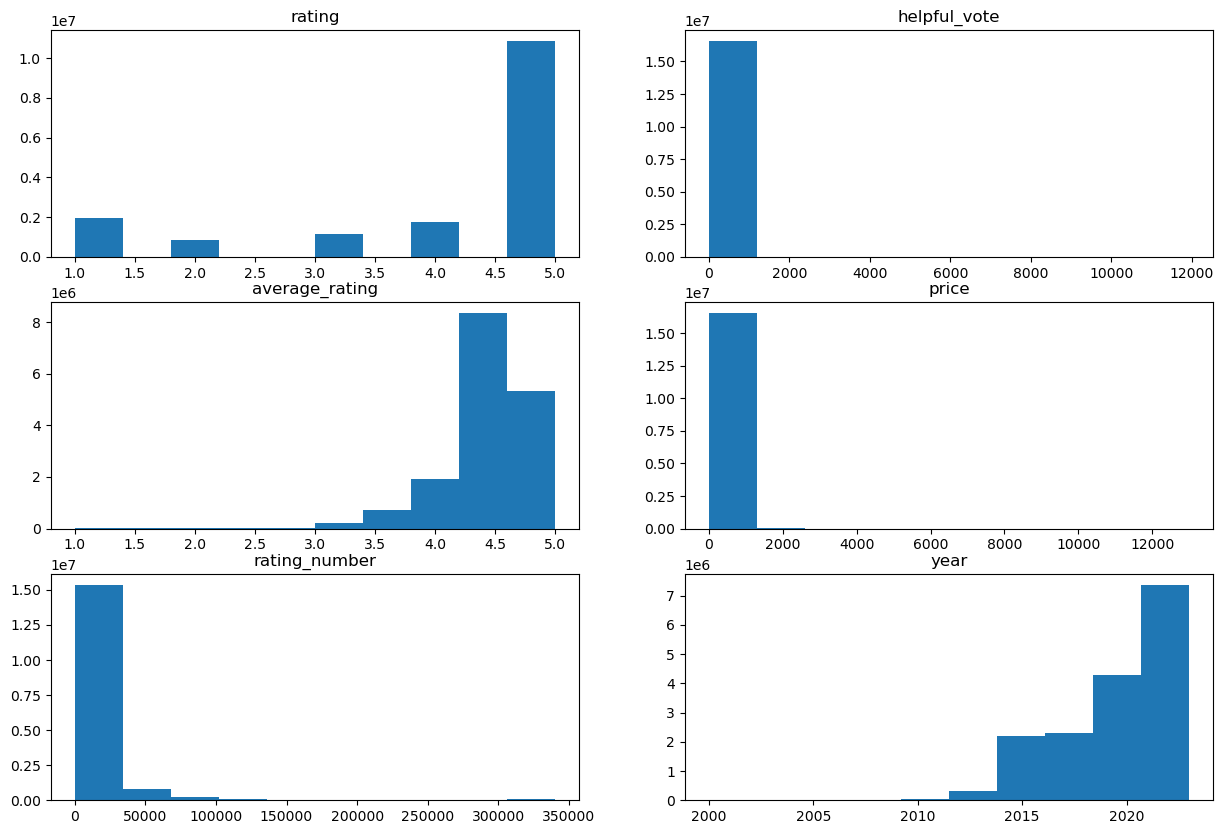

In [85]:
#Create histograms to asses distribution: 

# Creating the plots layout 
plt.subplots(3, 2, figsize=(15, 10))

# Plotting
for subplots, column in enumerate(df_corr.columns, 1):
    plt.subplot(3, 2, subplots)
    plt.hist(df_corr[column])
    plt.title(column)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=1.0)

Similar trends we saw earlier, ratings are skewed towards more positive ratings, customers seemed to quite happy on average with the products in the beauty and personal care category. The number of reviews have across across the years, with a dramatic increase after 2017, which was when Amazon launched the "Early Reviewer Program" that incentivized customers with gift cards to leave product reviews. 

Citation for history of Amazon's review ecosystem: 
https://www.forbes.com/sites/kirimasters/2021/03/22/a-short-history-of-amazons-product-review-ecosystem/#:~:text=February%202017:%20Amazon%20launches%20the,without%20actually%20writing%20a%20review.

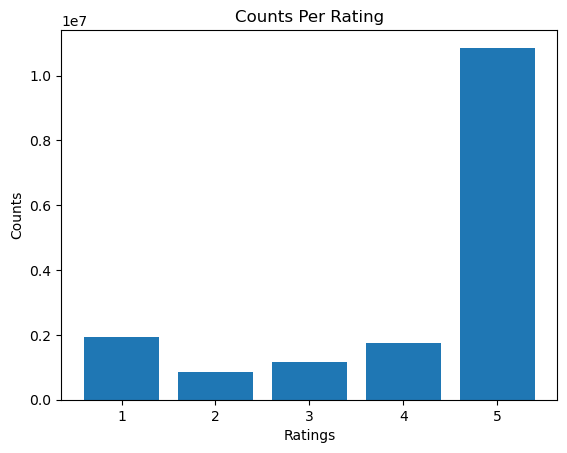

In [112]:
plt.figure()
plt.bar(df_corr['rating'].value_counts().index,
        df_corr['rating'].value_counts().values)
plt.ylabel('Counts')
plt.xlabel('Ratings')
plt.title('Counts Per Rating')
plt.show()

In [113]:
columns_to_plot = ['rating', 'helpful_vote', 'average_rating', 'price', 'rating_number', 'verified_purchase', 'sentiment']

In [114]:
df_plot = df_all_selected[columns_to_plot]  

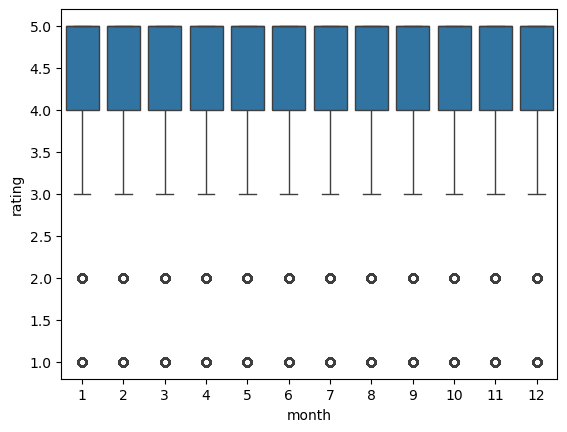

In [115]:
plt.figure()
sns.boxplot(x='month', y='rating', data=df_corr)
plt.show()

In [116]:
grouped_year = df_corr[["year", "rating"]].groupby("year").mean().reset_index()
grouped_year 

year    rating
0   2000  4.555556
1   2001  4.181818
2   2002  4.291667
3   2003  4.298246
4   2004  4.469828
5   2005  4.222985
6   2006  4.294402
7   2007  4.321418
8   2008  4.232082
9   2009  4.204485
10  2010  4.150171
11  2011  4.161679
12  2012  4.183333
13  2013  4.256606
14  2014  4.297157
15  2015  4.322480
16  2016  4.304540
17  2017  4.227458
18  2018  4.176295
19  2019  4.254522
20  2020  4.163357
21  2021  4.027842
22  2022  3.977247
23  2023  4.019758

Text(0, 0.5, 'Average Rating')

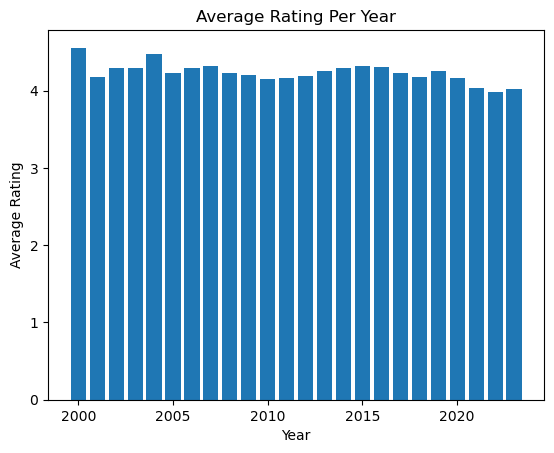

In [117]:
plt.figure
plt.bar(grouped_year["year"], grouped_year["rating"])
plt.title("Average Rating Per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

In [118]:
grouped_month = df_corr[["month", "rating"]].groupby("month").mean().reset_index()
grouped_month

month    rating
0       1  4.181651
1       2  4.124231
2       3  4.120891
3       4  4.099589
4       5  4.105371
5       6  4.117030
6       7  4.131634
7       8  4.126564
8       9  4.113115
9      10  4.117166
10     11  4.131493
11     12  4.163260

Text(0, 0.5, 'Average Rating')

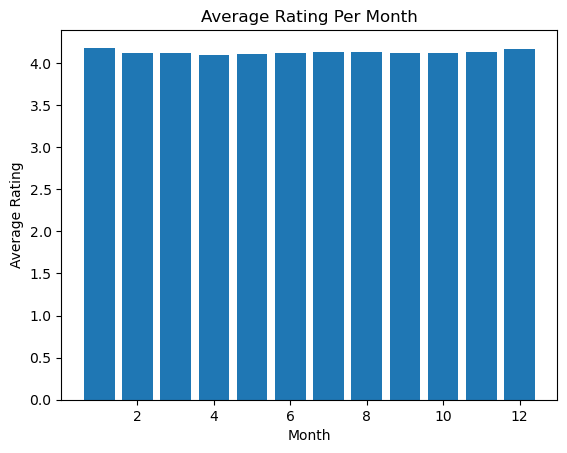

In [119]:
plt.figure
plt.bar(grouped_month["month"], grouped_month["rating"])
plt.title("Average Rating Per Month")
plt.xlabel("Month")
plt.ylabel("Average Rating")

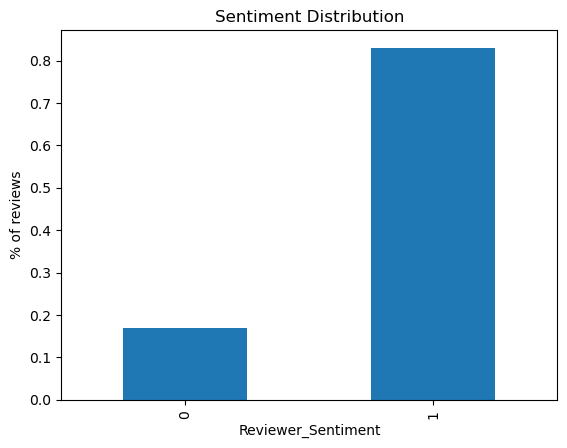

In [120]:
# calculate the fraction seen per "positive' and "negative" Sentiment bucked from Reviewer rating 

df_all_selected['sentiment'].value_counts(normalize=True).sort_index().plot(
    kind="bar",
    xlabel="Reviewer_Sentiment",
    ylabel="% of reviews",
    title="Sentiment Distribution"
)
plt.show()

We can also check how long the reviews (`text`) and title of the reviews (`title_x`) are. 

In [186]:
text_lengths=df_all_selected["text"].str.split(pat=" ").apply(len)

In [192]:
text_lengths.head(5)

0     242
4      19
5     203
12     53
13     38
Name: text, dtype: int64

In [195]:
text_lengths.mean() #The average lengths of reviews are about 33 words. 

33.41469901805992

In [197]:
title_lengths=df_all_selected["title_x"].str.split(pat=" ").apply(len)

In [199]:
title_lengths.head(5)

0     5
4     5
5     2
12    3
13    6
Name: title_x, dtype: int64

In [203]:
title_lengths.mean() #The average lengths of titles are about 4 words. 

3.8828082078751494

**7. Basic Time Series Analysis & Insights**

In [123]:
timeseries = df_all_selected

In [124]:
timeseries=timeseries.set_index("time")
timeseries.head()

user_id  rating  \
time                                                            
2021-03-26 07:24:14.733  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ       1   
2020-02-10 05:39:55.358  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ       3   
2015-12-02 00:49:08.000  AGGZ357AO26RQZVRLGU4D4N52DZQ       1   
2023-01-03 23:13:54.561  AG2L7H23R5LLKDKLBEF2Q3L2MVDA       1   
2022-12-24 01:13:57.231  AG2L7H23R5LLKDKLBEF2Q3L2MVDA       5   

                                                                   title_x  \
time                                                                         
2021-03-26 07:24:14.733            Gasoline!! Seriously reeks of gasoline!   
2020-02-10 05:39:55.358                Pretty, but didn’t close correctly.   
2015-12-02 00:49:08.000                           Unbottled disappointment   
2023-01-03 23:13:54.561                               VERY LIGHT COVERAGE.   
2022-12-24 01:13:57.231  My favorite colored-hair shampoo and condition...   

                                                                      text  \
time                                                                         
2021-03-26 07:24:14.733  Opened the package & instant migraine. I canno...   
2020-02-10 05:39:55.358  Mine wouldn’t close correctly so I sent it bac...   
2015-12-02 00:49:08.000  I don't often leave negative feedback about pr...   
2023-01-03 23:13:54.561  I returned this item because it had terrible c...   
2022-12-24 01:13:57.231  The scent is fresh like apples and the lather ...   

                             timestamp  verified_purchase  helpful_vote  \
time                                                                      
2021-03-26 07:24:14.733  1616743454733               True             0   
2020-02-10 05:39:55.358  1581313195358               True             0   
2015-12-02 00:49:08.000  1449017348000              False             3   
2023-01-03 23:13:54.561  1672787634561               True             0   
2022-12-24 01:13:57.231  1671844437231               True             4   

                        parent_asin  average_rating  price  rating_number  \
time                                                                        
2021-03-26 07:24:14.733  B00Z03RC80             4.3   9.87            882   
2020-02-10 05:39:55.358  B07X4FKLNK             4.6   8.99           8758   
2015-12-02 00:49:08.000  B010TWN80W             3.7  10.75             88   
2023-01-03 23:13:54.561  B014PVXY5W             4.3  29.97           5577   
2022-12-24 01:13:57.231  B00C5AHTAC             4.5  42.54          10026   

                         year  month  week_of_year  sentiment  
time                                                           
2021-03-26 07:24:14.733  2021      3            12          0  
2020-02-10 05:39:55.358  2020      2             7          1  
2015-12-02 00:49:08.000  2015     12            49          0  
2023-01-03 23:13:54.561  2023      1             1          0  
2022-12-24 01:13:57.231  2022     12            51          1

In [125]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16567406 entries, 2021-03-26 07:24:14.733000 to 2020-09-28 01:43:45.109000
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   user_id            object 
 1   rating             int64  
 2   title_x            object 
 3   text               object 
 4   timestamp          int64  
 5   verified_purchase  bool   
 6   helpful_vote       int64  
 7   parent_asin        object 
 8   average_rating     float64
 9   price              float64
 10  rating_number      int64  
 11  year               int32  
 12  month              int32  
 13  week_of_year       UInt32 
 14  sentiment          int64  
dtypes: UInt32(1), bool(1), float64(2), int32(2), int64(5), object(4)
memory usage: 1.7+ GB


In [126]:
timeseries.isna().sum() #confirming there is no missing values so we don't have to consider the common imputing options

user_id              0
rating               0
title_x              0
text                 0
timestamp            0
verified_purchase    0
helpful_vote         0
parent_asin          0
average_rating       0
price                0
rating_number        0
year                 0
month                0
week_of_year         0
sentiment            0
dtype: int64

**Variables that will be used to attempt this basic time series analysis: `rating`, `rating_number`, `helpful_vote`, `average_rating`, `price` and `sentiment`.**

In [128]:
rating_by_year = timeseries.groupby(timeseries.index.year)['rating'].mean()

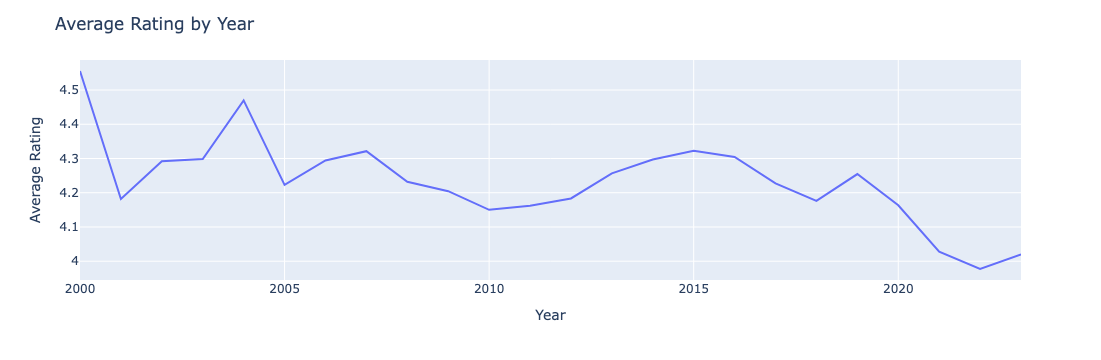

In [129]:
fig = px.line(rating_by_year, x=rating_by_year.index, y="rating",)
fig.update_layout(
    yaxis_title="Average Rating", 
    xaxis_title="Year",
    legend_title="", 
    title="Average Rating by Year"
)
fig.show()

In [130]:
totalrating_by_year = timeseries.groupby(timeseries.index.year)['rating'].sum()

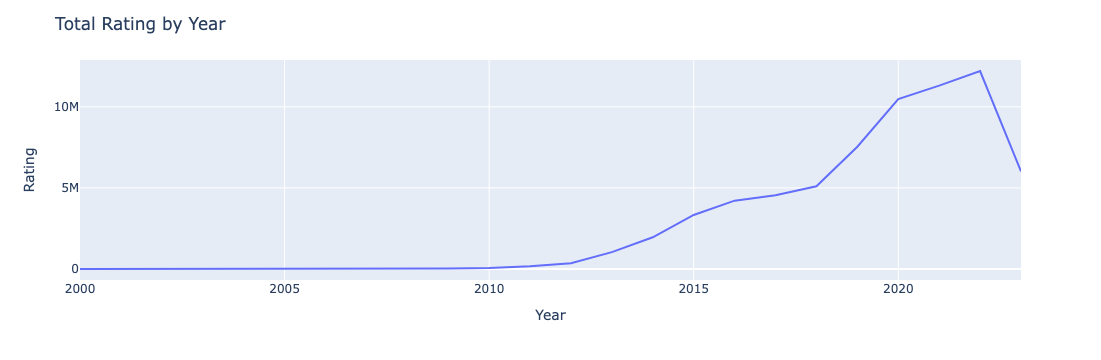

In [131]:
fig = px.line(totalrating_by_year, x=totalrating_by_year.index, y="rating",)
fig.update_layout(
    yaxis_title="Rating", 
    xaxis_title="Year",
    legend_title="", 
    title="Total Rating by Year"
)
fig.show()

In [132]:
rating_by_month = timeseries.groupby(timeseries.index.month)['rating'].mean()

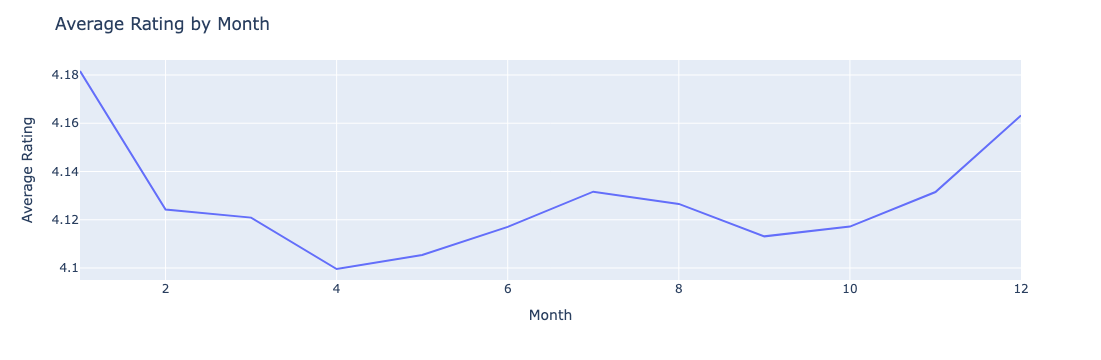

In [133]:
fig = px.line(rating_by_month, x=rating_by_month.index, y="rating",)
fig.update_layout(
    yaxis_title="Average Rating", 
    xaxis_title="Month",
    legend_title="", 
    title="Average Rating by Month"
)
fig.show()

In [134]:
price_by_month = timeseries.groupby(timeseries.index.month)['price'].mean()

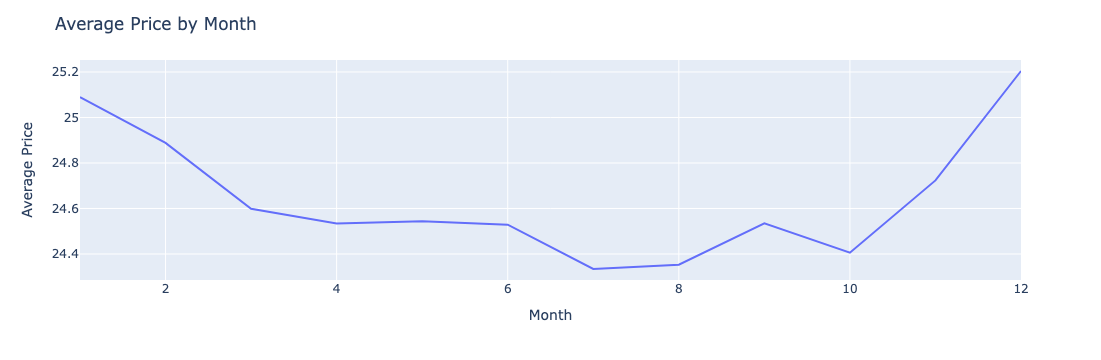

In [135]:
fig = px.line(price_by_month, x=price_by_month.index, y="price",)
fig.update_layout(
    yaxis_title="Average Price", 
    xaxis_title="Month",
    legend_title="", 
    title="Average Price by Month"
)
fig.show()

In [136]:
totalprice_by_month = timeseries.groupby(timeseries.index.month)['price'].sum()

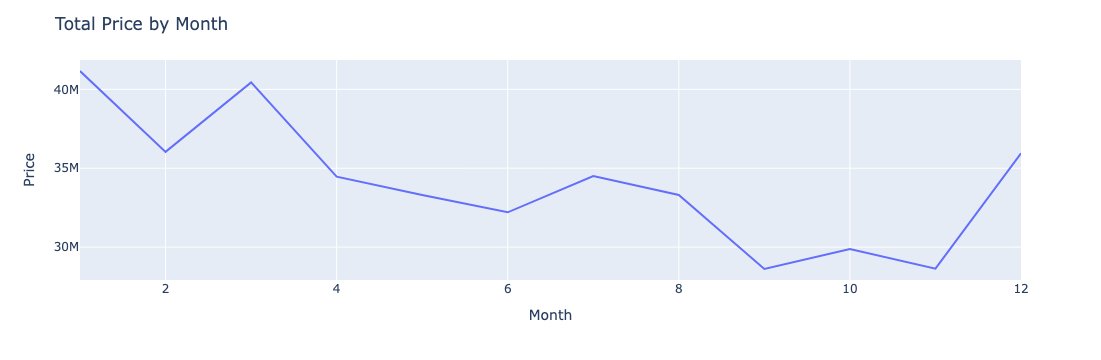

In [137]:
fig = px.line(totalprice_by_month, x=totalprice_by_month.index, y="price",)
fig.update_layout(
    yaxis_title="Price", 
    xaxis_title="Month",
    legend_title="", 
    title="Total Price by Month"
)
fig.show()

In [138]:
helpful_vote_by_month = timeseries.groupby(timeseries.index.month)['helpful_vote'].sum()

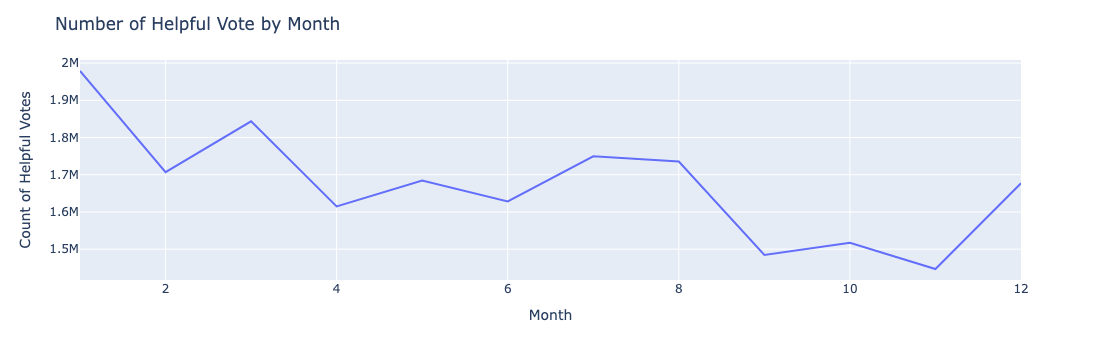

In [139]:
fig = px.line(helpful_vote_by_month, x=helpful_vote_by_month.index, y="helpful_vote",)
fig.update_layout(
    yaxis_title="Count of Helpful Votes ", 
    xaxis_title="Month",
    legend_title="", 
    title="Number of Helpful Vote by Month"
)
fig.show()

**8. Data is subsetted due to limited computational resource**

**Given the limited computational power of my laptop, we will subset 20% of the dataset for the rest of analysis. 20% of the data should be a good representation of the original data given there's 3313481 rows and 16 columns.**

In [170]:
data_subset=df_all_selected.sample(frac=0.2)

In [172]:
data_subset.shape

(3313481, 16)

In [175]:
data_subset.duplicated().mean()*100 #double checking, but no duplicate is expected since it's a subset from a cleaned dataset

0.0

In [177]:
data_subset.isnull().mean()*100 #double checking, but no nulls is expected since it's a subset from a cleaned dataset

user_id              0.0
rating               0.0
title_x              0.0
text                 0.0
timestamp            0.0
verified_purchase    0.0
helpful_vote         0.0
parent_asin          0.0
average_rating       0.0
price                0.0
rating_number        0.0
time                 0.0
year                 0.0
month                0.0
week_of_year         0.0
sentiment            0.0
dtype: float64

In [212]:
#Saving data_subset (which is 20% of df_all_selected) into a csv. 
data_subset.to_csv('AmazonBP_all_selected_20subset.csv', index=False)

In [214]:
data_subset_TFIDF=data_subset #will be used for text preprocessing using TFIDF 

In [224]:
data_subset_TFIDF.shape #confirming it's the same shape as data_subset 

(3313481, 16)

In [229]:
data_subset_TFIDF.head(5)

user_id  rating  \
2414340   AF67BP36UODQ3R7SZKQVMWLTSSAQ       5   
18808292  AFYOLLTGTS7XNK6D6TKFLUKZW6NQ       1   
22607985  AEZKQ2CZCPONJZE2LW5SUIG6AHSQ       2   
15258708  AERC47YZWUNVHP2KDEAMYV7PCSGQ       5   
12642493  AHJRFFQAZNAI76VDJAA7OILYSAKA       5   

                                       title_x  \
2414340       Perfect to fight winter dry skin   
18808292                               LEAK!!!   
22607985  They do not stay snug on the bottle.   
15258708                I love this concealer.   
12642493                               Amazing   

                                                       text      timestamp  \
2414340   I have these at home and at work. I have super...  1550503023397   
18808292  All 4 of the bottles we used leaked all over o...  1681904655780   
22607985  They snap off when trying to open to get to th...  1661181245169   
15258708                               Gives great coverage  1630320923284   
12642493  Super lightweight and spreads easily! A little...  1656857531359   

          verified_purchase  helpful_vote parent_asin  average_rating  price  \
2414340                True             0  B0BLZ3KHPV             4.8  16.40   
18808292               True             0  B07Y7D2J8W             4.5  12.99   
22607985               True             1  B0BB4YVT6C             3.5  15.95   
15258708               True             0  B08YNKY8GS             4.6  22.50   
12642493               True             0  B0BTMRQWJR             4.6  18.00   

          rating_number                    time  year  month  week_of_year  \
2414340            2618 2019-02-18 15:17:03.397  2019      2             8   
18808292           2188 2023-04-19 11:44:15.780  2023      4            16   
22607985            110 2022-08-22 15:14:05.169  2022      8            34   
15258708            279 2021-08-30 10:55:23.284  2021      8            35   
12642493           8924 2022-07-03 14:12:11.359  2022      7            26   

          sentiment  
2414340           1  
18808292          0  
22607985          0  
15258708          1  
12642493          1

**9. Text Analysis - Preprocessing using TFIDF with SVD and Base Modeling with Logistic Regression, Random Forest and AdaBoostClassifier**

df data_subset_TFIDF will be used.

Please see below for the types of variables in the df data_subset_TFIDF.

The bolded variables `text` and `sentiment` (target variable) are the essential variables for our binary classification. In other words, what features within the text provided by the reviewers are predictive of the customer's positive (rating or negative towards the product.

**Text:**
1. `title_x` = title given by the reviewer for their review
2. **`text` = body of text of the review**

**Continuous variables:**
1. `rating` = 1-5 
2. `helpful_vote` = number of counts a review has received a vote stating it as helpful
3. `average_rating` = average rating per product
4. `price` = price of product 
5. `rating_number`= number of rating a product has
6. `timestamp`= datetime that was extracted to `year`, `month` and `week_of_year`
8. `year` = year the review was written
9. `month`= month the review was written
10. `week_of_year`= week of year the review was written

**Categorical variables:**
1. `verified_purchase` = true (purchase was verified) and false (purchase not verified)
2. **`sentiment` = y = target variable, positive sentiment =1 (rating=3,4,5), negative sentiment =0 (rating=1,2)**

**Others:**
1. `user_id` = unique identifier of the reviewer
2. `parent_asin` = unique identifier that allow for the merging metadata and user review data.

In [246]:
X = data_subset_TFIDF[['user_id', 'rating', 'title_x', 'text', 'sentiment', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year']]
y = data_subset_TFIDF['sentiment'] # target variable

In [248]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [250]:
X_train.shape #checking the shape to ensure the 80% training data set is matched for X_train and y_train

(2650784, 15)

In [252]:
y_train.shape

(2650784,)

In [254]:
X_test.shape #checking the shape to ensure the 20% testing data set is matched for X_test and y_test

(662697, 15)

In [256]:
y_test.shape

(662697,)

In [258]:
X_train.head(5)

user_id  rating  \
2960290   AFORIV3GEVJWTD4AHDE57XOVIUTA       5   
1362547   AH5KMBXAZAHROIOOMOOXSVVNU3RQ       1   
5637905   AHIFUZAGP3DPY67THHXKL44UJGPA       4   
14921538  AHQIL4MJPRUER7Z6MWZJFBPCYZVQ       5   
20875070  AESD25YBB4QRKRJTG6CWGTJ3WMLQ       5   

                                                    title_x  \
2960290                                    Stunning results   
1362547   would not recommend for applying powder founda...   
5637905                                          Great size   
14921538                           Hairinfinity is the best   
20875070                                      Great quality   

                                                       text  sentiment  \
2960290   This is a great replacement for Prosacea. It w...          1   
1362547   totally useless as a powder foundation brush -...          0   
5637905   These hairpins are a great size for anyone's h...          1   
14921538  Love this line of shampoo and conditioner. It ...          1   
20875070  These are perfect for my deep tissue balm. Ver...          1   

              timestamp  verified_purchase  helpful_vote parent_asin  \
2960290   1473204583000               True             0  B07CTBJHHH   
1362547   1502484598658               True             1  B0BVVB953D   
5637905   1577079290292               True             0  B0B5KQMR5V   
14921538  1533592308054               True             0  B01LY6VPD9   
20875070  1684796373545               True             0  B0773JYKMB   

          average_rating  price  rating_number  year  month  week_of_year  
2960290              4.3  33.21          15082  2016      9            36  
1362547              4.5   3.00           1843  2017      8            32  
5637905              4.6   5.99           1853  2019     12            52  
14921538             4.3  19.00            827  2018      8            32  
20875070             4.4  11.95            282  2023      5            21

In [541]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
import re

# Define a custom tokenizer function
def custom_tokenizer(text):
    # lowercase the text
    text = text.lower()
    
    # remove special characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # split into words as tokens
    tokens = text.split()

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        token = stemmer.stem(lemmatizer.lemmatize(token))

    return tokens 

In [543]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD #dimensionality reduction similar to PCA

In [545]:
#TF-IDF transformer
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(tokenizer=custom_tokenizer, stop_words="english", max_features=1000, min_df=10)),
    ("svd", TruncatedSVD(n_components=10))
])

Since this will create a large sparse matrix, we reduced the components using SVD, similar to PCA. Also, the kernel kept on crashing, hence decided to use SVD for dimensionality reduction. However, the trade off is the interpretability of the data given that the columns will to transformed to 10 columns with numerical values. The other option would be to reduce the size of the subset even further, which was done in the CountVectorizer example in section 10 below. 

In [547]:
#Fit to the pipeline
pipeline.fit(X_train["text"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, min_df=10,
                                 stop_words='english',
                                 tokenizer=<function custom_tokenizer at 0xaede92520>)),
                ('svd', TruncatedSVD(n_components=10))])

In [549]:
#Transform 
X_train_tfidf_transformed = pipeline.transform(X_train["text"])

In [551]:
pipeline["tfidf"].get_feature_names_out()

array(['1', '10', '100', '12', '15', '2', '20', '23', '3', '30', '4', '5',
       '6', '7', '8', 'able', 'absolutely', 'absorbs', 'acne', 'acrylic',
       'actual', 'actually', 'add', 'added', 'adds', 'advertised',
       'affordable', 'ago', 'air', 'alcohol', 'allergic', 'alot',
       'amazing', 'amazon', 'anymore', 'apart', 'application',
       'applicator', 'applied', 'apply', 'applying', 'area', 'areas',
       'arent', 'arms', 'arrived', 'asked', 'available', 'away',
       'awesome', 'awful', 'baby', 'bad', 'bag', 'bags', 'balm', 'band',
       'bar', 'barely', 'base', 'based', 'basically', 'bath', 'bathroom',
       'battery', 'beard', 'beat', 'beautiful', 'beautifully', 'beauty',
       'bed', 'believe', 'best', 'better', 'big', 'bigger', 'birthday',
       'bit', 'black', 'blade', 'blades', 'blend', 'blends', 'blonde',
       'blow', 'blue', 'body', 'bother', 'bottle', 'bottles', 'bought',
       'box', 'br', 'brand', 'brands', 'break', 'breaking', 'bright',
       'bristle

In [688]:
#Convert the array to dataframe
X_train_tfidf_transformed_df = pd.DataFrame(
    data=X_train_tfidf_transformed, 
    columns=[f"svd_{i}" for i in range(X_train_tfidf_transformed.shape[1])]
)

X_train_tfidf_transformed_df

svd_0     svd_1     svd_2     svd_3     svd_4     svd_5     svd_6  \
0        0.220941 -0.127428  0.101213 -0.050290 -0.040337 -0.170010  0.170865   
1        0.085015 -0.006785 -0.058795 -0.053070  0.004714 -0.049172 -0.013688   
2        0.412851 -0.158538 -0.268868 -0.071184 -0.312992  0.459402 -0.007658   
3        0.218846  0.185645 -0.060026 -0.122933 -0.136500  0.159762  0.001623   
4        0.204807 -0.126195 -0.008559  0.155528 -0.118694 -0.075363 -0.128212   
...           ...       ...       ...       ...       ...       ...       ...   
2650779  0.122222 -0.030924 -0.110387  0.026047  0.008395 -0.092398 -0.062927   
2650780  0.090068 -0.035502 -0.108012  0.092604 -0.018822 -0.029436 -0.023316   
2650781  0.032319  0.001120 -0.013475 -0.015491  0.015236 -0.006790  0.008691   
2650782  0.201267 -0.046274 -0.090713 -0.085824  0.060217  0.104752  0.002895   
2650783  0.136648 -0.047043 -0.166067  0.062326 -0.009388 -0.067058 -0.013763   

            svd_7     svd_8     svd_9  
0       -0.037088  0.041214 -0.248839  
1       -0.031276  0.018437 -0.020485  
2        0.014380 -0.010610 -0.002051  
3       -0.015299 -0.007187 -0.033385  
4        0.161857  0.012878  0.069625  
...           ...       ...       ...  
2650779  0.034079  0.317025  0.149321  
2650780  0.002313 -0.010253 -0.035072  
2650781 -0.009531  0.011652 -0.028027  
2650782 -0.014374  0.025486 -0.051728  
2650783 -0.094361 -0.086090  0.085883  

[2650784 rows x 10 columns]

In [690]:
X_test_tfidf_transformed = pipeline.transform(X_test["text"])

**Notes on the names of the train, test set from TFIDF Preprocessing:**
1. X_train_tfidf_transformed, y_train
2. X_test_tfidf_transformed, y_test

In [692]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_tfidf_logreg = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_tfidf_logreg.fit(X_train_tfidf_transformed, y_train)

LogisticRegression(C=0.5, penalty=None)

In [694]:
#Score the model
print(f'Score on train: {text_tfidf_logreg.score(X_train_tfidf_transformed, y_train)}')
print(f'Score on test: {text_tfidf_logreg.score(X_test_tfidf_transformed, y_test)}')

Score on train: 0.8281640450523317
Score on test: 0.8277719681845549


The training and test score are very similar, at ~83%, which are solid accuracy scores and it shows that the model is not overfitted. 

In [696]:
#Data already test, split from the CV transformed set 
#X_train_tfidf_transformed, y_train
#X_test_tfidf_transformed, y_test

#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#xgb_model = XGBClassifier()
ab_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()

#xgb_model.fit(X_train, y_train)
ab_model.fit(X_train_tfidf_transformed, y_train)
rf_model.fit(X_train_tfidf_transformed, y_train)

print("Test Set Scores:")
print(f"AdaBoost score: {ab_model.score(X_test_tfidf_transformed, y_test)}")
print(f"Random Forest score: {rf_model.score(X_test_tfidf_transformed, y_test)}")
#print(f"XG Boost score: {xgb_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.8336404118322551
Random Forest score: 0.8582051827607489


Both test accuracy score for AdaBoostClassifier and RandomForestClassifier are slightly higher than that of logistic regression, at 83.4% and 85.8% respectively. Out of the 3 models ran with the TFIDF and SVD preprocessed data, Random Forest Classifer performed the best.

**10. Text Analysis - Preprocessing using 2) CountVectorizer and Base Modeling with Logistic Regression, Random Forest and AdaBoostClassifier**

In [302]:
data_subset_CV=data_subset

In [304]:
data_subset_CV.head(5)

user_id  rating  \
2414340   AF67BP36UODQ3R7SZKQVMWLTSSAQ       5   
18808292  AFYOLLTGTS7XNK6D6TKFLUKZW6NQ       1   
22607985  AEZKQ2CZCPONJZE2LW5SUIG6AHSQ       2   
15258708  AERC47YZWUNVHP2KDEAMYV7PCSGQ       5   
12642493  AHJRFFQAZNAI76VDJAA7OILYSAKA       5   

                                       title_x  \
2414340       Perfect to fight winter dry skin   
18808292                               LEAK!!!   
22607985  They do not stay snug on the bottle.   
15258708                I love this concealer.   
12642493                               Amazing   

                                                       text      timestamp  \
2414340   I have these at home and at work. I have super...  1550503023397   
18808292  All 4 of the bottles we used leaked all over o...  1681904655780   
22607985  They snap off when trying to open to get to th...  1661181245169   
15258708                               Gives great coverage  1630320923284   
12642493  Super lightweight and spreads easily! A little...  1656857531359   

          verified_purchase  helpful_vote parent_asin  average_rating  price  \
2414340                True             0  B0BLZ3KHPV             4.8  16.40   
18808292               True             0  B07Y7D2J8W             4.5  12.99   
22607985               True             1  B0BB4YVT6C             3.5  15.95   
15258708               True             0  B08YNKY8GS             4.6  22.50   
12642493               True             0  B0BTMRQWJR             4.6  18.00   

          rating_number                    time  year  month  week_of_year  \
2414340            2618 2019-02-18 15:17:03.397  2019      2             8   
18808292           2188 2023-04-19 11:44:15.780  2023      4            16   
22607985            110 2022-08-22 15:14:05.169  2022      8            34   
15258708            279 2021-08-30 10:55:23.284  2021      8            35   
12642493           8924 2022-07-03 14:12:11.359  2022      7            26   

          sentiment  
2414340           1  
18808292          0  
22607985          0  
15258708          1  
12642493          1

In [306]:
data_subset_CV.shape

(3313481, 16)

In [308]:
X2 = data_subset_CV[['user_id', 'rating', 'title_x', 'text', 'sentiment', 'timestamp', 'verified_purchase', 'helpful_vote', 'parent_asin', 'average_rating', 'price', 'rating_number', 'year', 'month', 'week_of_year']]
y2 = data_subset_CV['sentiment'] # target variable

In [310]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [316]:
X2_train.shape

(2650784, 15)

In [320]:
y2_train.shape

(2650784,)

In [318]:
X2_test.shape

(662697, 15)

In [322]:
y2_test.shape

(662697,)

In [451]:
# 1. Instantiate 
bagofwords_X2_train = CountVectorizer(max_features=500, min_df=1, stop_words='english')

# 2. Fit 
bagofwords_X2_train.fit(X2_train['text'])

# 3. Transform
X2_train_transformed = bagofwords_X2_train.transform(X2_train['text'])
X2_train_transformed

<2650784x500 sparse matrix of type '<class 'numpy.int64'>'
	with 22438272 stored elements in Compressed Sparse Row format>

In [467]:
bagofwords_X2_train.get_feature_names_out()

array(['10', '100', '20', '30', '34', 'able', 'absolutely', 'acne',
       'actually', 'add', 'advertised', 'ago', 'amazing', 'amazon',
       'application', 'applied', 'apply', 'applying', 'area', 'arrived',
       'away', 'awesome', 'bad', 'bag', 'balm', 'bar', 'base', 'bath',
       'battery', 'beard', 'beautiful', 'beauty', 'believe', 'best',
       'better', 'big', 'bit', 'black', 'blade', 'blades', 'blonde',
       'blow', 'blue', 'body', 'bottle', 'bottles', 'bought', 'box', 'br',
       'brand', 'brands', 'break', 'bristles', 'broke', 'broken', 'brown',
       'brush', 'brushes', 'buy', 'buying', 'came', 'cap', 'care', 'case',
       'cause', 'change', 'cheap', 'cheaper', 'clean', 'cleaning',
       'clear', 'clippers', 'clips', 'close', 'coat', 'color', 'colors',
       'comb', 'come', 'comes', 'comfortable', 'company', 'completely',
       'compliments', 'conditioner', 'container', 'continue', 'cool',
       'cost', 'couldn', 'couple', 'cover', 'coverage', 'cream', 'curl',
  

In [469]:
X2_train_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [471]:
X2_train_transformed_df = pd.DataFrame(
    data=X2_train_transformed.toarray(),
    columns=bagofwords_X2_train.get_feature_names_out()
)
X2_train_transformed_df

10  100  20  30  34  able  absolutely  acne  actually  add  ...  \
0         0    0   0   0   0     0           0     0         0    0  ...   
1         0    0   0   0   0     0           0     0         0    0  ...   
2         0    0   0   0   0     0           0     0         0    0  ...   
3         0    0   0   0   0     0           0     0         0    0  ...   
4         0    0   0   0   0     0           0     0         0    0  ...   
...      ..  ...  ..  ..  ..   ...         ...   ...       ...  ...  ...   
2650779   0    0   1   0   0     0           0     0         0    0  ...   
2650780   0    0   0   0   0     0           0     0         0    0  ...   
2650781   0    0   0   0   0     0           0     0         0    0  ...   
2650782   0    0   0   0   0     0           0     0         0    0  ...   
2650783   0    0   0   0   0     0           0     0         0    0  ...   

         wonderful  work  worked  working  works  worth  wouldn  wrong  year  \
0                0     0       0        0      1      0       0      0     0   
1                0     0       0        0      0      0       0      0     0   
2                0     0       0        0      0      0       0      0     0   
3                0     0       0        0      0      0       0      0     0   
4                0     0       0        0      0      0       0      0     0   
...            ...   ...     ...      ...    ...    ...     ...    ...   ...   
2650779          0     0       0        0      0      0       0      0     0   
2650780          0     0       0        0      0      0       0      0     0   
2650781          0     0       0        0      0      0       0      0     0   
2650782          0     0       0        0      0      1       0      0     0   
2650783          0     0       0        0      0      0       0      0     0   

         years  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2650779      1  
2650780      0  
2650781      0  
2650782      0  
2650783      0  

[2650784 rows x 500 columns]

In [475]:
#Transform X2_test
#using the bagofwords_X2_train because want test & train to be countvectorized into the same format for comparison

X2_test_transformed = bagofwords_X2_train.transform(X2_test['text'])
X2_test_transformed

<662697x500 sparse matrix of type '<class 'numpy.int64'>'
	with 5607662 stored elements in Compressed Sparse Row format>

In [477]:
X2_test_transformed_df = pd.DataFrame(
    data=X2_test_transformed.toarray(),
    columns=bagofwords_X2_train.get_feature_names_out()
)
X2_test_transformed_df

10  100  20  30  34  able  absolutely  acne  actually  add  ...  \
0        0    0   0   0   0     0           0     0         0    0  ...   
1        0    0   0   0   0     0           0     0         0    0  ...   
2        0    0   0   0   0     0           0     0         0    0  ...   
3        0    0   0   0   0     0           0     0         0    0  ...   
4        1    0   0   0   0     0           0     0         0    0  ...   
...     ..  ...  ..  ..  ..   ...         ...   ...       ...  ...  ...   
662692   0    0   0   0   0     0           0     0         0    0  ...   
662693   0    0   0   0   0     0           0     0         0    0  ...   
662694   0    0   0   0   0     0           0     0         0    0  ...   
662695   0    0   0   0   0     0           0     0         0    0  ...   
662696   0    0   0   0   0     0           0     0         0    0  ...   

        wonderful  work  worked  working  works  worth  wouldn  wrong  year  \
0               0     0       0        0      0      0       0      0     0   
1               0     0       0        0      0      0       0      0     0   
2               0     0       0        0      0      0       0      0     0   
3               0     0       0        0      0      0       0      0     0   
4               0     0       0        0      0      0       0      0     0   
...           ...   ...     ...      ...    ...    ...     ...    ...   ...   
662692          0     0       1        0      0      0       0      0     1   
662693          0     0       0        0      0      0       0      0     0   
662694          0     1       0        0      0      0       0      0     0   
662695          0     0       0        0      0      0       0      0     0   
662696          0     1       0        0      0      0       0      0     0   

        years  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
662692      0  
662693      0  
662694      0  
662695      0  
662696      0  

[662697 rows x 500 columns]

**Notes on the names of the train, test set from CountVectorizer Preprocessing:**
1. X2_train_transformed, y2_train
2. X2_test_transformed, y2_test

In [480]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_logreg = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_logreg.fit(X2_train_transformed, y2_train)

LogisticRegression(C=0.5, penalty=None)

In [482]:
#Score the model
print(f'Score on train: {text_logreg.score(X2_train_transformed, y2_train)}')
print(f'Score on test: {text_logreg.score(X2_test_transformed, y2_test)}')

Score on train: 0.8770793848159639
Score on test: 0.8763024428962256


The score on the training set is 87.71% accurarte, and the score for the testing set is 87.63%. Given that the score of both are very similar, it suggests that the training set is not likely to be overfitted and the model is not too bad. Still, we can potentially try to optimize parameters to see if we can increase the accuracy score.

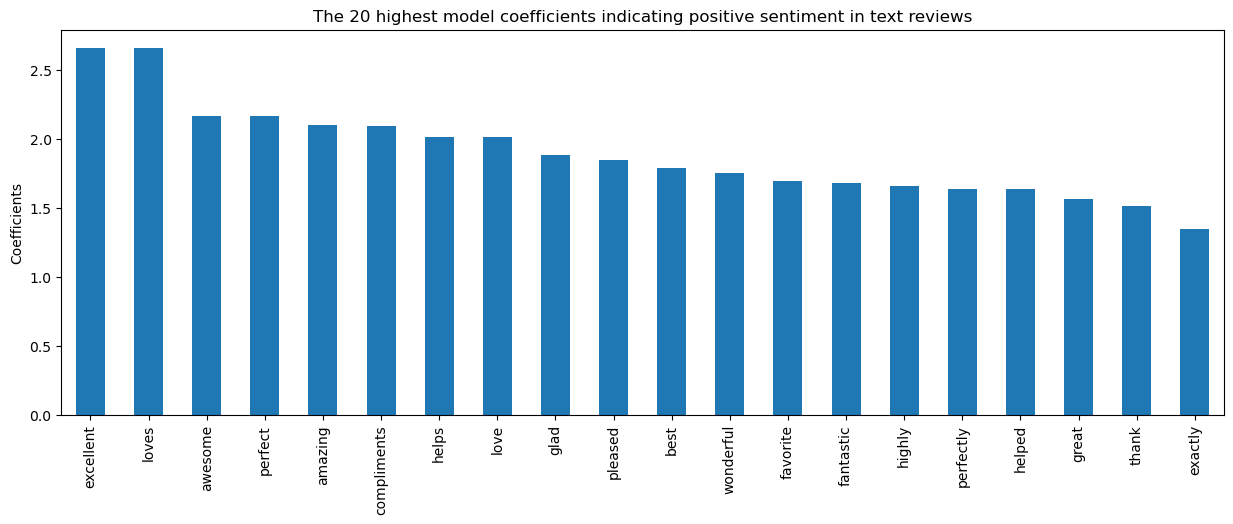

In [502]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg.coef_[0]},
    index=bagofwords_X2_train.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

In [510]:
X2_train[(X2_train["text"].str.contains("excellent")) & (X2_train["verified_purchase"] == True)] #Assessing the reviews that contain excellent

user_id  rating  \
11040157  AFZ6KD4FPQEHVMWOIHIOPHEL4JHQ       5   
10856836  AEIJTUD7OE7QOHTA4CZRAYTQT3UA       4   
16541618  AFHNW7TYJBDSPFPPISN34WMXN7JQ       5   
3885024   AFTXKQXREQKTTAK7GAHLG3UM37HQ       5   
2616639   AFBZORQYGV7J4FUYBA4MUFHM3DAA       5   
...                                ...     ...   
7784390   AEROSQ2QVU7YKXCUQKCQJWLREYDQ       4   
7133797   AF7IO7ZZHZD53QAXZUE7WEY6YWTA       5   
13419744  AFYS5NSCCTBLYW65MQTANBWLDZAA       5   
6184196   AHKOAFLKW6BNR2X6BRQNZ37XWTFA       5   
2615364   AFPLY6WD5YTD7UBU6WXMPNLDARRA       5   

                                                  title_x  \
11040157               Light weight and very moisturizing   
10856836                        Good buy and good quality   
16541618  Great quality and touch - A make up lover must!   
3885024                                          Love it.   
2616639             Great natural product.. for many uses   
...                                                   ...   
7784390   Wonderful fragrance -- Aura makes good products   
7133797                                            Great!   
13419744                                      Great stuff   
6184196                                          Oh My...   
2615364                                        Five Stars   

                                                       text  sentiment  \
11040157  This has become one of my favorite night time ...          1   
10856836  This product, though heavy works very well. It...          1   
16541618  All four of the shapes that came in are excell...          1   
3885024   Absolutely love it! You will never believe it ...          1   
2616639   This is an excellent product for many uses... ...          1   
...                                                     ...        ...   
7784390   Very nice fragrance, but it seems to require a...          1   
7133797   These roller bottles are excellent- I haven't ...          1   
13419744   A little pricey yet product is excellent for Men          1   
6184196   Talk about a small treat for your feet! This i...          1   
2615364                                     Works excellent          1   

              timestamp  verified_purchase  helpful_vote parent_asin  \
11040157  1662569765484               True             2  B093K6F5ZD   
10856836  1541162727464               True             0  B00IT1HKV4   
16541618  1449676511000               True             1  B00D0ANSAG   
3885024   1519842902373               True             3  B0BRMHGV1Y   
2616639   1619448550848               True             0  B088MK2F7Y   
...                 ...                ...           ...         ...   
7784390   1384966997000               True             2  B009RW4OB8   
7133797   1548705735738               True             0  B0C61GR5CQ   
13419744  1672599701977               True             0  B003JCKPF6   
6184196   1618115530569               True             1  B001F3A0JC   
2615364   1503540850366               True             0  B01H6YAJXA   

          average_rating  price  rating_number  year  month  week_of_year  
11040157             4.3  17.00             83  2022      9            36  
10856836             4.4  18.95           7957  2018     11            44  
16541618             4.4  17.97           1440  2015     12            50  
3885024              4.7  13.75           5258  2018      2             9  
2616639              4.7  25.99            503  2021      4            17  
...                  ...    ...            ...   ...    ...           ...  
7784390              4.6  37.99            109  2013     11            47  
7133797              4.7   8.98           6541  2019      1             5  
13419744             4.6  54.73            268  2023      1            52  
6184196              4.7  21.95             87  2021      4            14  
2615364              4.3  47.99          37540  2017      8            34  

[17078 rows x 15 columns]

In [512]:
filtered_pos_df = X2_train[(X2_train["text"].str.contains("excellent")) & (X2_train["verified_purchase"] == True)][["text", "verified_purchase"]]

In [514]:
filtered_pos_df #get insights on what is being said positively about the products

text  verified_purchase
11040157  This has become one of my favorite night time ...               True
10856836  This product, though heavy works very well. It...               True
16541618  All four of the shapes that came in are excell...               True
3885024   Absolutely love it! You will never believe it ...               True
2616639   This is an excellent product for many uses... ...               True
...                                                     ...                ...
7784390   Very nice fragrance, but it seems to require a...               True
7133797   These roller bottles are excellent- I haven't ...               True
13419744   A little pricey yet product is excellent for Men               True
6184196   Talk about a small treat for your feet! This i...               True
2615364                                     Works excellent               True

[17078 rows x 2 columns]

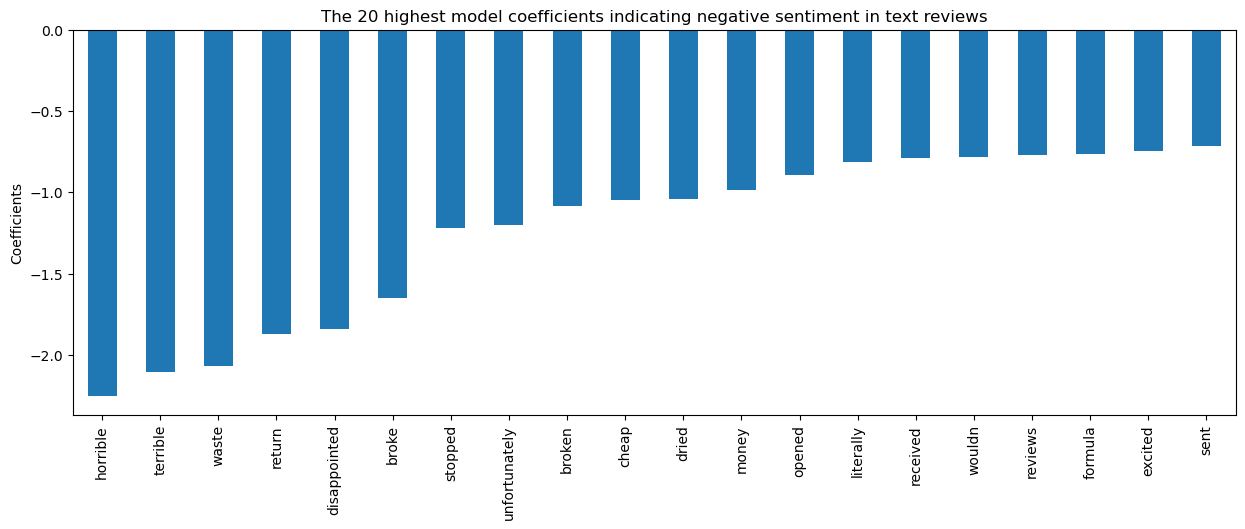

In [500]:
word_counts = pd.DataFrame(
    {"coefficients": text_logreg.coef_[0]},
    index=bagofwords_X2_train.get_feature_names_out()
).sort_values("coefficients", ascending=True)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating negative sentiment in text reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

In [516]:
#Assessing the reviews that contain horrible and only verified_purchase to remove potential fake reviews 
X2_train[(X2_train["text"].str.contains("horrible")) & (X2_train["verified_purchase"] == True)] 

user_id  rating  \
6463144   AHFCZURJALHRMI6PDAPD2QI5MEWQ       1   
8964844   AGQZGUU6ABJLQ2GVUZPHO6WRBFZQ       2   
15776186  AGU7KAEYTQXVOPOH4OWAISTY2FRQ       5   
7106077   AE7I5R6C64BBKZE4QCPTO53N26FA       1   
11432879  AGG4MYT6PCPO4AYBW2U7MBXXUN6Q       1   
...                                ...     ...   
13406846  AFAJEZIUW2ZQONTLYAUYLC44BKPA       5   
5512521   AEXX5X7Z364LEORTUOBNTTWQ7EPA       1   
17988805  AHECK5DZEK7NUMTCH44EDUN7JDNA       2   
11775526  AFLT5LWA72KDY5ACIPOXRKA3UCPA       2   
15505392  AGN7FTFDJGONKA27VE67ITSXMVEQ       1   

                                               title_x  \
6463144                           Separated and watery   
8964844        Beauty is only skin deep on this shaver   
15776186                       Hope they never change!   
7106077   My house still smells horrible a week later.   
11432879                          literally do not buy   
...                                                ...   
13406846                                     It works!   
5512521                                      Too thick   
17988805           Allergic Chemicals in this product.   
11775526                 Rotten potato,  fishy odor...   
15505392                                 Disappointed!   

                                                       text  sentiment  \
6463144   Product arrived okay but when I went to use it...          0   
8964844   A beautiful design hides sub par construction ...          0   
15776186  Been using for 4 years. Everything else either...          1   
7106077   When the box arrived I could smell it a few fe...          0   
11432879  so i’ve been trying this stuff on and off for ...          0   
...                                                     ...        ...   
13406846  I had horrible calluses from walking barefoot....          1   
5512521                       Too thick and smells horrible          0   
17988805  The glue is one of the most horrible odors. It...          0   
11775526  Third time buying this. Always had a slight od...          0   
15505392  Sorry to write a bad review for a company whos...          0   

              timestamp  verified_purchase  helpful_vote parent_asin  \
6463144   1616030452016               True             0  B07NSMCD16   
8964844   1629219653778               True             0  B08LP2J7WP   
15776186  1389109752000               True             0  B000SX0Z9K   
7106077   1658347359092               True             0  B0B6QZKJ94   
11432879  1634882112053               True             0  B07PFY5KNL   
...                 ...                ...           ...         ...   
13406846  1623928810994               True             0  B0B6G84457   
5512521   1614948427685               True             0  B07GY1YGM1   
17988805  1580222705541               True             0  B01J860M54   
11775526  1677708115990               True             2  B0BLCX97X3   
15505392  1459982550000               True             7  B09GN3GC8G   

          average_rating  price  rating_number  year  month  week_of_year  
6463144              4.7  23.34           2008  2021      3            11  
8964844              4.0  29.99           3112  2021      8            33  
15776186             4.5  30.00            912  2014      1             2  
7106077              4.8  21.12            420  2022      7            29  
11432879             4.2   9.99           5865  2021     10            42  
...                  ...    ...            ...   ...    ...           ...  
13406846             4.6  13.99          26513  2021      6            24  
5512521              4.5   9.90           8254  2021      3             9  
17988805             3.8  32.89             85  2020      1             5  
11775526             4.7  28.99           1962  2023      3             9  
15505392             4.5   6.35           7278  2016      4            14  

[9985 rows x 15 columns]

In [518]:
filtered_neg_df = X2_train[(X2_train["text"].str.contains("horrible")) & (X2_train["verified_purchase"] == True)][["text", "verified_purchase"]] 

In [520]:
filtered_neg_df #get insights on what is being said negatively about the products

text  verified_purchase
6463144   Product arrived okay but when I went to use it...               True
8964844   A beautiful design hides sub par construction ...               True
15776186  Been using for 4 years. Everything else either...               True
7106077   When the box arrived I could smell it a few fe...               True
11432879  so i’ve been trying this stuff on and off for ...               True
...                                                     ...                ...
13406846  I had horrible calluses from walking barefoot....               True
5512521                       Too thick and smells horrible               True
17988805  The glue is one of the most horrible odors. It...               True
11775526  Third time buying this. Always had a slight od...               True
15505392  Sorry to write a bad review for a company whos...               True

[9985 rows x 2 columns]

In [536]:
from sklearn.ensemble import RandomForestClassifier
estimators = [('normalise', StandardScaler(with_mean=False)),
              ('dimred', TruncatedSVD(n_components=20)),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'dimred__n_components':[20],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga', 'liblinear'],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
        {
            'model': [RandomForestClassifier()],
             'normalise': [None], 
             'model__n_estimators': [100, 200],
             'model__min_samples_split': [2, 5],
             'model__max_depth': [5, 10]
        }
    
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X2_train_transformed, y2_train)

KeyboardInterrupt: 

In [538]:
from sklearn.ensemble import RandomForestClassifier
estimators = [('normalise', StandardScaler(with_mean=False)),
              ('dimred', TruncatedSVD(n_components=20)),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'dimred__n_components':[20],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga', 'liblinear'],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X2_train_transformed, y2_train)

KeyboardInterrupt: 

**Notes on the names of the train, test set from CountVectorizer Preprocessing:**
1. X2_train_transformed, y2_train
2. X2_test_transformed, y2_test

In [565]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgbc = XGBClassifier()
xgbc.fit(X2_train_transformed, y2_train)

y_pred = xgbc.predict(X2_test_transformed)
print(classification_report(y2_test, y2_pred))     ###error message bc xhboost is not installed 

ModuleNotFoundError: No module named 'xgboost'

In [567]:
#Data already test, split from the CV transformed set 
#1. X2_train_transformed, y2_train
#2. X2_test_transformed, y2_test

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

ab_model = AdaBoostClassifier()
rf_model = RandomForestClassifier()

ab_model.fit(X2_train_transformed, y2_train)
rf_model.fit(X2_train_transformed, y2_train)

print("Test Set Scores:")
print(f"AdaBoost score: {ab_model.score(X2_test_transformed, y2_test)}")
print(f"Random Forest score: {rf_model.score(X2_test_transformed, y2_test)}")

KeyboardInterrupt: 

**Unfortunately, the kernels above keeps on running for about 30+ mins each and then go into unknown status, so I had to pause it. Maybe it's due to the large size of the data set. I have reduced the size of the dataset below and was able to run the base models.**

In [576]:
data_subset2=df_all_selected.sample(frac=0.005)

In [578]:
data_subset2.shape #A much smaller dataset now

(82837, 16)

In [580]:
data_subset2.duplicated().mean()*100 #confirming no duplicates 

0.0

In [582]:
data_subset2.isnull().mean()*100 #confirming no nulls

user_id              0.0
rating               0.0
title_x              0.0
text                 0.0
timestamp            0.0
verified_purchase    0.0
helpful_vote         0.0
parent_asin          0.0
average_rating       0.0
price                0.0
rating_number        0.0
time                 0.0
year                 0.0
month                0.0
week_of_year         0.0
sentiment            0.0
dtype: float64

In [584]:
data_subset_CV2=data_subset2

In [586]:
X3 = data_subset_CV2['text']
y3 = data_subset_CV2['sentiment'] # target variable

In [588]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

In [590]:
X3_train.shape

(66269,)

In [592]:
X3_test.shape

(16568,)

In [594]:
y3_train.shape

(66269,)

In [596]:
y3_test.shape

(16568,)

In [598]:
# 1. Instantiate 
bagofwords_X3_train = CountVectorizer(max_features=500, min_df=1, stop_words='english')

# 2. Fit 
bagofwords_X3_train.fit(X3_train)

# 3. Transform
X3_train_transformed = bagofwords_X3_train.transform(X3_train)
X3_train_transformed

<66269x500 sparse matrix of type '<class 'numpy.int64'>'
	with 561590 stored elements in Compressed Sparse Row format>

In [600]:
bagofwords_X3_train.get_feature_names_out()

array(['10', '100', '20', '30', '34', 'able', 'absolutely', 'acne',
       'actually', 'add', 'advertised', 'ago', 'amazing', 'amazon',
       'application', 'applied', 'apply', 'applying', 'area', 'arrived',
       'away', 'awesome', 'bad', 'bag', 'balm', 'bar', 'base', 'bath',
       'beard', 'beautiful', 'beauty', 'believe', 'best', 'better', 'big',
       'bigger', 'bit', 'black', 'blade', 'blades', 'blonde', 'blow',
       'blue', 'body', 'bottle', 'bottles', 'bought', 'box', 'br',
       'brand', 'brands', 'break', 'bristles', 'broke', 'broken', 'brown',
       'brush', 'brushes', 'buy', 'buying', 'came', 'cap', 'care',
       'careful', 'case', 'cause', 'change', 'cheap', 'cheaper', 'clean',
       'cleaning', 'clear', 'clippers', 'clips', 'close', 'coat', 'color',
       'colors', 'comb', 'come', 'comes', 'comfortable', 'company',
       'completely', 'compliments', 'conditioner', 'container',
       'continue', 'cool', 'cost', 'couldn', 'couple', 'cover',
       'coverage', 'c

In [602]:
X3_train_transformed_df = pd.DataFrame(
    data=X3_train_transformed.toarray(),
    columns=bagofwords_X3_train.get_feature_names_out()
)
X3_train_transformed_df

10  100  20  30  34  able  absolutely  acne  actually  add  ...  \
0       0    0   0   0   0     0           0     0         0    1  ...   
1       0    0   0   0   0     0           0     0         0    0  ...   
2       0    0   0   0   0     0           0     0         0    0  ...   
3       0    0   0   0   0     0           0     0         0    0  ...   
4       0    0   0   0   0     0           0     0         0    0  ...   
...    ..  ...  ..  ..  ..   ...         ...   ...       ...  ...  ...   
66264   0    0   0   0   0     0           0     0         0    0  ...   
66265   0    0   0   0   0     0           0     0         0    0  ...   
66266   0    0   0   0   0     0           0     0         0    0  ...   
66267   0    0   0   0   0     0           0     0         0    0  ...   
66268   0    0   0   0   0     0           0     0         0    0  ...   

       wonderful  work  worked  working  works  worth  wouldn  wrong  year  \
0              0     0       0        0      0      0       0      0     0   
1              0     0       0        0      0      0       0      0     0   
2              0     0       0        0      0      0       0      0     0   
3              0     0       0        0      0      0       0      0     0   
4              0     0       0        0      0      0       0      0     0   
...          ...   ...     ...      ...    ...    ...     ...    ...   ...   
66264          0     0       0        0      0      0       0      0     0   
66265          0     0       0        0      0      0       0      0     0   
66266          0     0       0        0      0      0       0      0     0   
66267          0     0       0        0      0      1       0      0     0   
66268          0     0       0        0      1      0       0      0     0   

       years  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
66264      0  
66265      0  
66266      0  
66267      0  
66268      0  

[66269 rows x 500 columns]

In [609]:
#Transform X3_test
#using the bagofwords_X3_train because want test & train to be countvectorized into the same format for comparison

X3_test_transformed = bagofwords_X3_train.transform(X3_test)
X3_test_transformed

<16568x500 sparse matrix of type '<class 'numpy.int64'>'
	with 139378 stored elements in Compressed Sparse Row format>

In [611]:
X3_test_transformed_df = pd.DataFrame(
    data=X3_test_transformed.toarray(),
    columns=bagofwords_X3_train.get_feature_names_out()
)
X3_test_transformed_df

10  100  20  30  34  able  absolutely  acne  actually  add  ...  \
0       0    0   0   0   0     0           0     0         0    0  ...   
1       0    0   0   0   0     0           0     0         0    0  ...   
2       0    0   0   0   0     0           0     0         0    0  ...   
3       0    0   0   0   0     0           0     0         0    0  ...   
4       0    0   0   0   0     0           0     0         0    0  ...   
...    ..  ...  ..  ..  ..   ...         ...   ...       ...  ...  ...   
16563   0    0   0   0   0     0           0     0         0    0  ...   
16564   0    0   0   0   0     0           0     0         0    0  ...   
16565   0    0   0   0   0     0           0     0         0    0  ...   
16566   0    1   0   0   0     0           0     0         0    0  ...   
16567   0    0   0   0   0     0           0     0         0    0  ...   

       wonderful  work  worked  working  works  worth  wouldn  wrong  year  \
0              0     0       0        0      0      0       1      0     0   
1              0     0       0        0      0      0       0      0     0   
2              0     0       0        0      0      0       0      0     0   
3              0     0       0        0      0      0       0      0     0   
4              0     0       0        0      0      0       0      0     0   
...          ...   ...     ...      ...    ...    ...     ...    ...   ...   
16563          0     0       0        0      0      0       0      0     0   
16564          0     0       0        0      0      0       0      0     0   
16565          0     0       0        0      0      0       0      0     0   
16566          0     0       0        0      0      0       0      0     0   
16567          0     0       0        0      0      0       0      0     0   

       years  
0          0  
1          1  
2          0  
3          0  
4          0  
...      ...  
16563      0  
16564      0  
16565      0  
16566      0  
16567      0  

[16568 rows x 500 columns]

**Notes on the names of the train, test set from CountVectorizer Preprocessing using a smaller subset:**
1. X3_train_transformed, y3_train
2. X3_test_transformed, y3_test

In [605]:
from sklearn.linear_model import LogisticRegression

#Instantiate model
text_logreg2 = LogisticRegression(C=0.5, penalty=None)

#Fitting the model 
text_logreg2.fit(X3_train_transformed, y3_train)

LogisticRegression(C=0.5, penalty=None)

In [613]:
#Score the model
print(f'Score on train: {text_logreg.score(X3_train_transformed, y3_train)}')
print(f'Score on test: {text_logreg.score(X3_test_transformed, y3_test)}')

Score on train: 0.798925591151217
Score on test: 0.7975012071463061


In [615]:
#Data already test, split from the CV transformed set 
#1. X3_train_transformed, y3_train
#2. X3_test_transformed, y3_test

#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#xgb_model = XGBClassifier()
ab_model = AdaBoostClassifier() #when not listed, it uses the default parameters 
rf_model = RandomForestClassifier() #when not listed, it uses the default parameters 

#xgb_model.fit(X_train, y_train)
ab_model.fit(X3_train_transformed, y3_train)
rf_model.fit(X3_train_transformed, y3_train)

print("Test Set Scores:")
print(f"AdaBoost score: {ab_model.score(X3_test_transformed, y3_test)}")
print(f"Random Forest score: {rf_model.score(X3_test_transformed, y3_test)}")
#print(f"XG Boost score: {xgb_model.score(X_test, y_test)}")

Test Set Scores:
AdaBoost score: 0.8575567358763883
Random Forest score: 0.8714992757122163


The above shows that the issue with the kernel keep on crashing maybe related to the size of the dataset. 

Moreover, there is an increase in accuracy score per AdaBoostClassifier and RandomForestClassifier compared to the baseline logistic regression on the test set at 79.75%.

In [620]:
from sklearn.metrics import accuracy_score, classification_report

#Getting the classification report for the AdaBoostClassifier

y_pred_ab = ab_model.predict(X3_test_transformed)

print("Accuracy:", accuracy_score(y3_test, y_pred_ab))
print(classification_report(y3_test, y_pred_ab))

Accuracy: 0.8575567358763883
              precision    recall  f1-score   support

           0       0.73      0.28      0.40      2854
           1       0.87      0.98      0.92     13714

    accuracy                           0.86     16568
   macro avg       0.80      0.63      0.66     16568
weighted avg       0.84      0.86      0.83     16568



In [622]:
from sklearn.metrics import accuracy_score, classification_report

#Getting the classification report for the RandomForestClassifier 

y_pred_rf = rf_model.predict(X3_test_transformed)

print("Accuracy:", accuracy_score(y3_test, y_pred_rf))
print(classification_report(y3_test, y_pred_rf))

Accuracy: 0.8714992757122163
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      2854
           1       0.89      0.96      0.93     13714

    accuracy                           0.87     16568
   macro avg       0.79      0.71      0.74     16568
weighted avg       0.86      0.87      0.86     16568



Both the AdaBoostClassifier and RandomForestClassifier have an higher accuracy score compared to logistic regression. The F1-score of the RandomForestClassifier is higher. 

Negative = 0 and Positive sentiment = 1. A higher f1-score for 1 (positive sentiment) at 0.93 compared to 0.55 for 0 (negative sentiment), this means that the model for index 1 is better at both identifying positive sentiment (precision) and identifying all actual positive cases (recall). In order words, the model is better at correctly identifying positive sentiment from the text reviews and avoid false positives (identify negative review as positive).

Given that the business context is to better understand what qualities of the product contribute to greater customer satisfaction and higher ratings, a higher recall is more important than precision because we want to identify as many positive reviews as possible given that we will be analyzing those customer feedback to identify area where the product/service is doing well and use those insights to strategize special programs to retain and gain more customers.

Next, we will use a the GridSearch approach to see if we can increase the accuracy of the logistic regression and the RandomForestClassifier. 

In [624]:
from sklearn.ensemble import RandomForestClassifier
estimators = [('normalise', StandardScaler(with_mean=False)),
              ('dimred', TruncatedSVD(n_components=20)),
              ('model', LogisticRegression())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'dimred__n_components':[20],
             'model__penalty': ['l1', 'l2'],
             'model__solver': ['saga', 'liblinear'],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
        {
            'model': [RandomForestClassifier()],
             'normalise': [None], 
             'model__n_estimators': [100, 200],
             'model__min_samples_split': [2, 5],
             'model__max_depth': [5, 10]
        }
    
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X3_train_transformed, y3_train)

In [633]:
# Best estimator object
fittedgrid.best_estimator_

Pipeline(steps=[('normalise', None), ('dimred', TruncatedSVD(n_components=20)),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

In [635]:
# Best hyperparameters
fittedgrid.best_params_

{'model': RandomForestClassifier(),
 'model__max_depth': 10,
 'model__min_samples_split': 2,
 'model__n_estimators': 200,
 'normalise': None}

In [637]:
fittedgrid.score(X3_test_transformed, y3_test)

0.8345002414292613

In [639]:
fittedgrid.score(X3_train_transformed, y3_train)

0.8395026332070802

Though the GridSearch idenified the RandomForestClassifier with specific hyperparameters as best with accuracy score at 83.5%, which is lower than then default RandomForestClassifier above with 87.1%. This tell us that I probably did not identify the best available hyperparameters for the GridSearch to loop through and should try others in the next iteration.

**11. Overview of Next Steps for Sprint 3**
1. Given that the kernels kept on crashing for performing pipelines and GridSearchCV with this larger dataset size, I plan to move the notebook to Google Colab for Sprint 3. In Sprint 2, for TFIDF, SVD was used to handle the issue and for CV, further reduction in the dataset size was used.
2. Preprocess the text data using representation learning via sentence2vec and perform downstream baseline modelings.
3. Compare models via accuracy scores. 
4. Use ROC curve to compare how well the classification models balance between the misses in precision and recall. We will prioritize recall despite the risk of increased false positives because we want to identify as many positive reviews as possible.
5. Cluster Analysis 
6. Sequential Neural Network via Keras
7. Topic Modeling using BERT 